In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
rains = pd.read_csv('../data/weatherAUS.csv')
rains['Date'] = pd.to_datetime(rains['Date'])
# Extract the month and year from the 'Date' column
rains['Year'] = rains['Date'].dt.year
rains['Month'] = rains['Date'].dt.month


In [3]:
rains.dropna(subset=['RainTomorrow'], inplace=True)
assert(len(rains[rains['RainTomorrow'].isnull()]) == 0)

rains_x= rains.drop(columns=['RainTomorrow'])  # Drop the target column from features
rains_y = rains['RainTomorrow']  # Target variable

# Split the dataset
X_train, rains_test, y_train, rain_tomorrow_test = train_test_split(
    rains_x, rains_y, 
    test_size=0.2,  # 20% for testing
    stratify=rains_y,     # Keep class proportions the same
    random_state=42 # For reproducibility
)
X_train["RainTomorrow"] = y_train
rains = X_train



In [4]:
city_coords = {
    'Albury': (-36.0785, 146.9136),
    'BadgerysCreek': (-33.8813, 150.7282),
    'Cobar': (-31.8667, 145.7667),
    'CoffsHarbour': (-30.3026, 153.1137),
    'Moree': (-29.4706, 149.8392),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2202, 151.5433),
    'NorfolkIsland': (-29.0408, 167.9541),
    'Penrith': (-33.7675, 150.6931),
    'Richmond': (-33.5982, 150.7581),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9399, 151.1753),
    'WaggaWagga': (-35.0433, 147.3587),
    'Williamtown': (-32.7951, 151.8118),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4167, 149.1000),
    'MountGinini': (-35.4471, 148.9685),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7582, 144.2814),
    'Sale': (-38.1100, 147.0737),
    'MelbourneAirport': (-37.6692, 144.8411),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1850, 142.1625),
    'Nhil': (-35.2060, 141.6450),
    'Portland': (-38.3516, 141.5878),
    'Watsonia': (-37.7139, 145.0875),
    'Dartmoor': (-37.7251, 141.2843),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9203, 145.7710),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2589, 146.8183),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8321, 140.7807),
    'Nuriootpa': (-34.4973, 138.9966),
    'Woomera': (-31.1395, 136.7984),
    'Albany': (-35.0285, 117.8837),
    'Witchcliffe': (-33.7015, 115.0911),
    'PearceRAAF': (-31.9131, 115.9741),
    'PerthAirport': (-31.9402, 115.9676),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-33.3937, 121.2060),
    'Walpole': (-34.9639, 115.8106),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4391, 147.1349),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4686, 132.2678),
    'Uluru': (-25.3444, 131.0369)
}

# Columnas 
Se identifican las siguientes columnas:
Columnas del Conjunto de Datos "Rain in Australia":

- **Date (Fecha):**
  - **Descripción**: La fecha de la observación meteorológica.
  - **Formato**: `YYYY-MM-DD` (Año-Mes-Día).
  - **Ejemplo**: `2008-12-01`.

- **Location (Ubicación):**
  - **Descripción**: La estación meteorológica donde se registró la observación.
  - **Valores**: Varias ubicaciones en Australia, como:
    - Albury
    - Coffs Harbour
    - Mildura
    - Sydney Airport
  - **Ejemplo**: `Albury`.

- **MinTemp (Temperatura Mínima):**
  - **Descripción**: La temperatura mínima (en grados Celsius) registrada durante el día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `14.2`.

- **MaxTemp (Temperatura Máxima):**
  - **Descripción**: La temperatura máxima (en grados Celsius) registrada durante el día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `28.1`.

- **Rainfall (Precipitación):**
  - **Descripción**: La cantidad de precipitación (en milímetros) registrada durante el día. Si no hubo lluvia, este valor será cero.
  - **Unidad**: mm (milímetros).
  - **Ejemplo**: `5.0`.

- **Evaporation (Evaporación):**
  - **Descripción**: La cantidad de evaporación (en milímetros) registrada durante el día. Mide la pérdida de agua de la superficie debido a la evaporación.
  - **Unidad**: mm (milímetros).
  - **Ejemplo**: `6.2`.

- **Sunshine (Horas de Sol):**
  - **Descripción**: La cantidad de horas de sol registradas durante el día.
  - **Unidad**: Horas.
  - **Ejemplo**: `7.4`.

- **WindGustDir (Dirección del Mayor Ráfaga de Viento):**
  - **Descripción**: La dirección de la ráfaga de viento más fuerte registrada durante el día.
  - **Valores**: Direcciones como `N` (Norte), `E` (Este), `S` (Sur), `O` (Oeste), y direcciones intermedias como `NE` (Noreste), `SE` (Sureste), etc.
  - **Ejemplo**: `E` (Este).

- **WindGustSpeed (Velocidad del Mayor Ráfaga de Viento):**
  - **Descripción**: La velocidad (en kilómetros por hora) de la ráfaga de viento más fuerte registrada durante el día.
  - **Unidad**: km/h (kilómetros por hora).
  - **Ejemplo**: `39`.

- **WindDir9am (Dirección del Viento a las 9 AM):**
  - **Descripción**: La dirección del viento a las 9 AM del día.
  - **Valores**: Mismas posibles direcciones que `WindGustDir`.
  - **Ejemplo**: `NE` (Noreste).

- **WindSpeed9am (Velocidad del Viento a las 9 AM):**
  - **Descripción**: La velocidad media del viento (en kilómetros por hora) a las 9 AM del día.
  - **Unidad**: km/h (kilómetros por hora).
  - **Ejemplo**: `6`.

- **Humidity9am (Humedad Relativa a las 9 AM):**
  - **Descripción**: La humedad relativa (en porcentaje) a las 9 AM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `65`.

- **Humidity3pm (Humedad Relativa a las 3 PM):**
  - **Descripción**: La humedad relativa (en porcentaje) a las 3 PM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `45`.

- **Pressure9am (Presión Atmosférica a las 9 AM):**
  - **Descripción**: La presión atmosférica (en hectopascales, hPa) a las 9 AM.
  - **Unidad**: hPa (hectopascales).
  - **Ejemplo**: `1013.5`.

- **Pressure3pm (Presión Atmosférica a las 3 PM):**
  - **Descripción**: La presión atmosférica (en hectopascales, hPa) a las 3 PM.
  - **Unidad**: hPa (hectopascales).
  - **Ejemplo**: `1012.1`.

- **Cloud9am (Nubes a las 9 AM):**
  - **Descripción**: El porcentaje de nubes a las 9 AM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `40`.

- **Cloud3pm (Nubes a las 3 PM):**
  - **Descripción**: El porcentaje de nubes a las 3 PM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `50`.

- **Temp9am (Temperatura a las 9 AM):**
  - **Descripción**: La temperatura (en grados Celsius) a las 9 AM del día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `16.0`.

- **Temp3pm (Temperatura a las 3 PM):**
  - **Descripción**: La temperatura (en grados Celsius) a las 3 PM del día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `25.0`.

- **RainTomorrow (Lluvia Mañana):**
  - **Descripción**: Variable objetivo que indica si lloverá mañana.
  - **Valores**:
    - `Yes`: Lloverá mañana.
    - `No`: No lloverá mañana.
  - **Ejemplo**: `Yes`.
La mayoría de las columnas son numéricas (temperaturas, precipitación, etc.), pero algunas columnas como las direcciones del viento y la lluvia de mañana son categóricas. Esto puede ser útil al preparar los datos para modelos de clasificación.

## Valores Faltantes
 El conjunto de datos puede tener valores faltantes (NaNs), especialmente en columnas como evaporación, velocidad del viento y nubosidad. Algunos registros pueden tener datos incompletos, lo que requiere un procesamiento previo para modelos de aprendizaje automático.


# Columnas 
Se identifican las siguientes columnas:
Columnas del Conjunto de Datos "Rain in Australia":

- **Date (Fecha):**
  - **Descripción**: La fecha de la observación meteorológica.
  - **Formato**: `YYYY-MM-DD` (Año-Mes-Día).
  - **Ejemplo**: `2008-12-01`.

- **Location (Ubicación):**
  - **Descripción**: La estación meteorológica donde se registró la observación.
  - **Valores**: Varias ubicaciones en Australia, como:
    - Albury
    - Coffs Harbour
    - Mildura
    - Sydney Airport
  - **Ejemplo**: `Albury`.

- **MinTemp (Temperatura Mínima):**
  - **Descripción**: La temperatura mínima (en grados Celsius) registrada durante el día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `14.2`.

- **MaxTemp (Temperatura Máxima):**
  - **Descripción**: La temperatura máxima (en grados Celsius) registrada durante el día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `28.1`.

- **Rainfall (Precipitación):**
  - **Descripción**: La cantidad de precipitación (en milímetros) registrada durante el día. Si no hubo lluvia, este valor será cero.
  - **Unidad**: mm (milímetros).
  - **Ejemplo**: `5.0`.

- **Evaporation (Evaporación):**
  - **Descripción**: La cantidad de evaporación (en milímetros) registrada durante el día. Mide la pérdida de agua de la superficie debido a la evaporación.
  - **Unidad**: mm (milímetros).
  - **Ejemplo**: `6.2`.

- **Sunshine (Horas de Sol):**
  - **Descripción**: La cantidad de horas de sol registradas durante el día.
  - **Unidad**: Horas.
  - **Ejemplo**: `7.4`.

- **WindGustDir (Dirección del Mayor Ráfaga de Viento):**
  - **Descripción**: La dirección de la ráfaga de viento más fuerte registrada durante el día.
  - **Valores**: Direcciones como `N` (Norte), `E` (Este), `S` (Sur), `O` (Oeste), y direcciones intermedias como `NE` (Noreste), `SE` (Sureste), etc.
  - **Ejemplo**: `E` (Este).

- **WindGustSpeed (Velocidad del Mayor Ráfaga de Viento):**
  - **Descripción**: La velocidad (en kilómetros por hora) de la ráfaga de viento más fuerte registrada durante el día.
  - **Unidad**: km/h (kilómetros por hora).
  - **Ejemplo**: `39`.

- **WindDir9am (Dirección del Viento a las 9 AM):**
  - **Descripción**: La dirección del viento a las 9 AM del día.
  - **Valores**: Mismas posibles direcciones que `WindGustDir`.
  - **Ejemplo**: `NE` (Noreste).

- **WindSpeed9am (Velocidad del Viento a las 9 AM):**
  - **Descripción**: La velocidad media del viento (en kilómetros por hora) a las 9 AM del día.
  - **Unidad**: km/h (kilómetros por hora).
  - **Ejemplo**: `6`.

- **Humidity9am (Humedad Relativa a las 9 AM):**
  - **Descripción**: La humedad relativa (en porcentaje) a las 9 AM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `65`.

- **Humidity3pm (Humedad Relativa a las 3 PM):**
  - **Descripción**: La humedad relativa (en porcentaje) a las 3 PM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `45`.

- **Pressure9am (Presión Atmosférica a las 9 AM):**
  - **Descripción**: La presión atmosférica (en hectopascales, hPa) a las 9 AM.
  - **Unidad**: hPa (hectopascales).
  - **Ejemplo**: `1013.5`.

- **Pressure3pm (Presión Atmosférica a las 3 PM):**
  - **Descripción**: La presión atmosférica (en hectopascales, hPa) a las 3 PM.
  - **Unidad**: hPa (hectopascales).
  - **Ejemplo**: `1012.1`.

- **Cloud9am (Nubes a las 9 AM):**
  - **Descripción**: El porcentaje de nubes a las 9 AM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `40`.

- **Cloud3pm (Nubes a las 3 PM):**
  - **Descripción**: El porcentaje de nubes a las 3 PM del día.
  - **Unidad**: % (porcentaje).
  - **Ejemplo**: `50`.

- **Temp9am (Temperatura a las 9 AM):**
  - **Descripción**: La temperatura (en grados Celsius) a las 9 AM del día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `16.0`.

- **Temp3pm (Temperatura a las 3 PM):**
  - **Descripción**: La temperatura (en grados Celsius) a las 3 PM del día.
  - **Unidad**: °C (grados Celsius).
  - **Ejemplo**: `25.0`.

- **RainTomorrow (Lluvia Mañana):**
  - **Descripción**: Variable objetivo que indica si lloverá mañana.
  - **Valores**:
    - `Yes`: Lloverá mañana.
    - `No`: No lloverá mañana.
  - **Ejemplo**: `Yes`.
La mayoría de las columnas son numéricas (temperaturas, precipitación, etc.), pero algunas columnas como las direcciones del viento y la lluvia de mañana son categóricas. Esto puede ser útil al preparar los datos para modelos de clasificación.

## Valores Faltantes
 El conjunto de datos puede tener valores faltantes (NaNs), especialmente en columnas como evaporación, velocidad del viento y nubosidad. Algunos registros pueden tener datos incompletos, lo que requiere un procesamiento previo para modelos de aprendizaje automático.

# Analysis 

In [5]:
rains.shape

(113754, 25)

In [6]:
rains.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 103642 to 122308
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           113754 non-null  datetime64[ns]
 1   Location       113754 non-null  object        
 2   MinTemp        113241 non-null  float64       
 3   MaxTemp        113496 non-null  float64       
 4   Rainfall       112623 non-null  float64       
 5   Evaporation    65059 non-null   float64       
 6   Sunshine       59410 non-null   float64       
 7   WindGustDir    106269 non-null  object        
 8   WindGustSpeed  106314 non-null  float64       
 9   WindDir9am     105699 non-null  object        
 10  WindDir3pm     110688 non-null  object        
 11  WindSpeed9am   112672 non-null  float64       
 12  WindSpeed3pm   111624 non-null  float64       
 13  Humidity9am    112336 non-null  float64       
 14  Humidity3pm    110857 non-null  float64       
 15  

In [7]:
rains.describe()

Date        MinTemp        MaxTemp  \
count                         113754  113241.000000  113496.000000   
mean   2013-04-01 20:54:33.590379264      12.172898      23.218870   
min              2007-11-02 00:00:00      -8.500000      -4.800000   
25%              2011-01-06 00:00:00       7.600000      17.900000   
50%              2013-05-28 00:00:00      12.000000      22.600000   
75%              2015-06-14 00:00:00      16.800000      28.200000   
max              2017-06-25 00:00:00      31.400000      48.100000   
std                              NaN       6.406406       7.120048   

            Rainfall   Evaporation      Sunshine  WindGustSpeed  \
count  112623.000000  65059.000000  59410.000000  106314.000000   
mean        2.360774      5.484554      7.622614      39.953684   
min         0.000000      0.000000      0.000000       6.000000   
25%         0.000000      2.600000      4.900000      31.000000   
50%         0.000000      4.800000      8.500000      39.000000   
75%         0.600000      7.400000     10.600000      48.000000   
max       371.000000    145.000000     14.300000     135.000000   
std         8.544243      4.208367      3.783751      13.571751   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  112672.000000  111624.000000  112336.000000  110857.000000   
mean       13.981885      18.637255      68.838493      51.505227   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      19.000000      70.000000      52.000000   
75%        19.000000      24.000000      83.000000      66.000000   
max       130.000000      87.000000     100.000000     100.000000   
std         8.865721       8.798030      19.053148      20.806658   

         Pressure9am    Pressure3pm      Cloud9am      Cloud3pm  \
count  102467.000000  102492.000000  70877.000000  68085.000000   
mean     1017.660456    1015.262716      4.434146      4.502445   
min       980.500000     977.100000      0.000000      0.000000   
25%      1013.000000    1010.500000      1.000000      2.000000   
50%      1017.600000    1015.200000      5.000000      5.000000   
75%      1022.400000    1020.000000      7.000000      7.000000   
max      1041.000000    1039.600000      9.000000      9.000000   
std         7.105209       7.036500      2.887667      2.722294   

             Temp9am        Temp3pm           Year          Month  
count  113019.000000  111551.000000  113754.000000  113754.000000  
mean       16.977363      21.676257    2012.760879       6.407159  
min        -7.200000      -5.400000    2007.000000       1.000000  
25%        12.300000      16.600000    2011.000000       3.000000  
50%        16.700000      21.100000    2013.000000       6.000000  
75%        21.600000      26.400000    2015.000000       9.000000  
max        40.200000      46.200000    2017.000000      12.000000  
std         6.499264       6.942100       2.542725       3.422525

<Axes: >

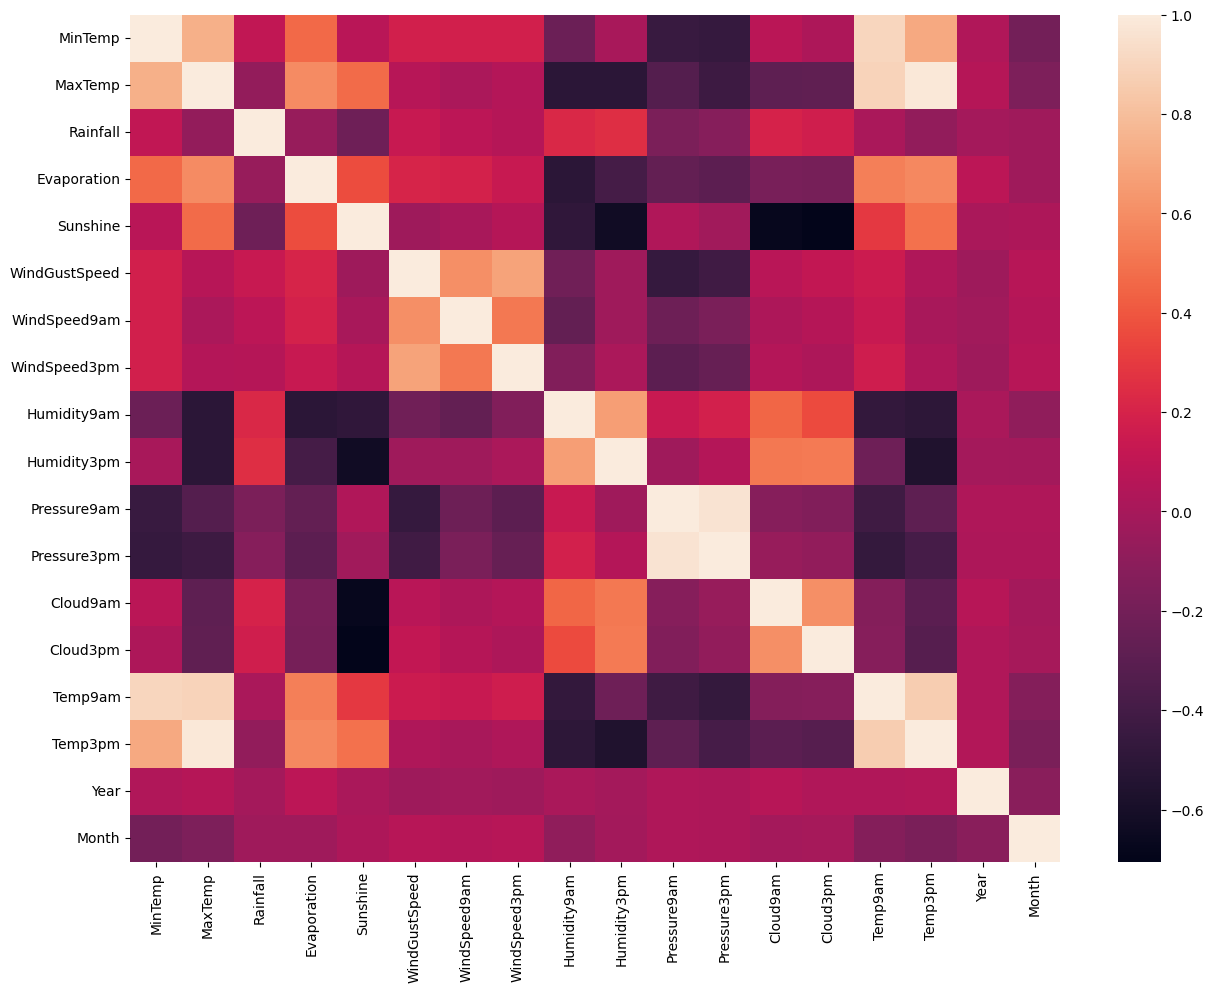

In [8]:
plt.figure(figsize=(15,11))

sns.heatmap(rains.corr(numeric_only=True))

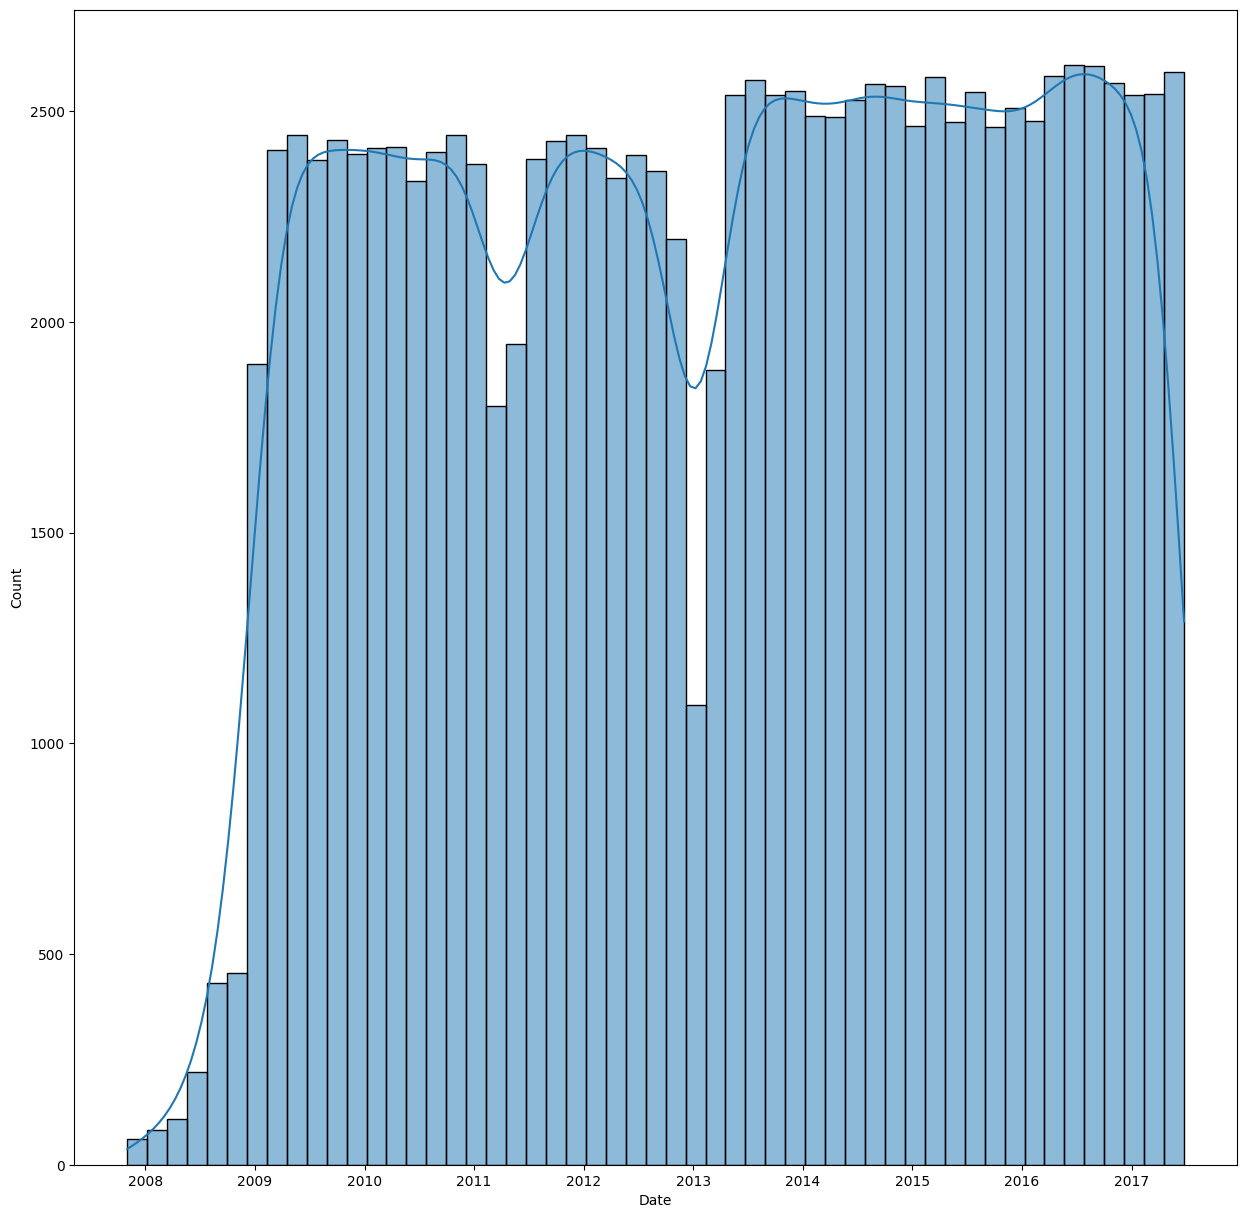

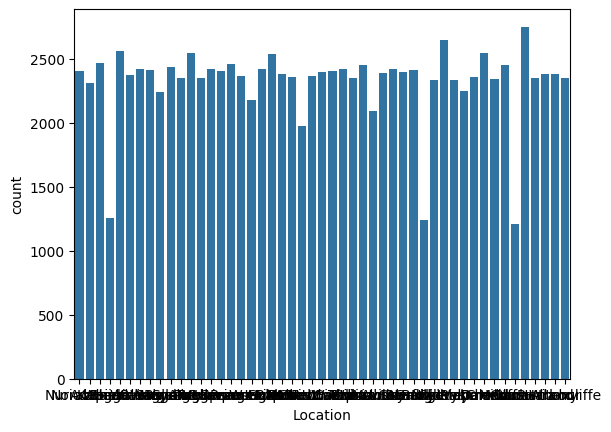

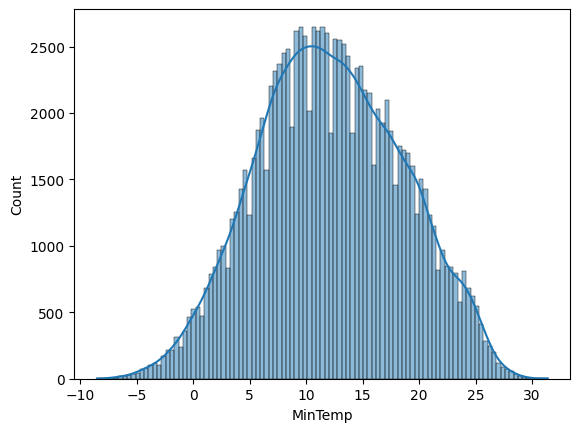

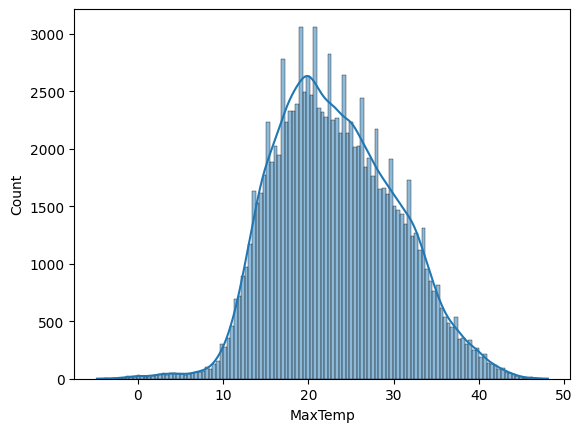

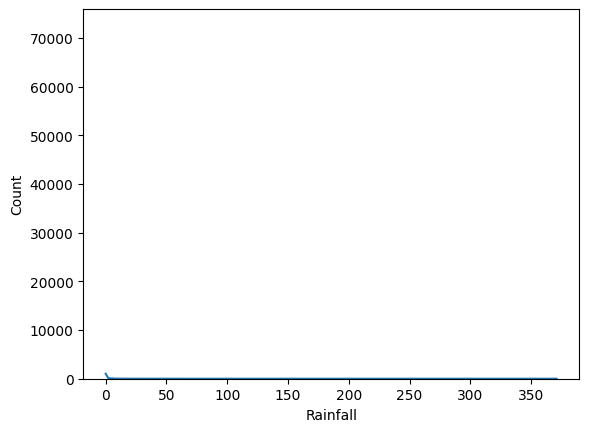

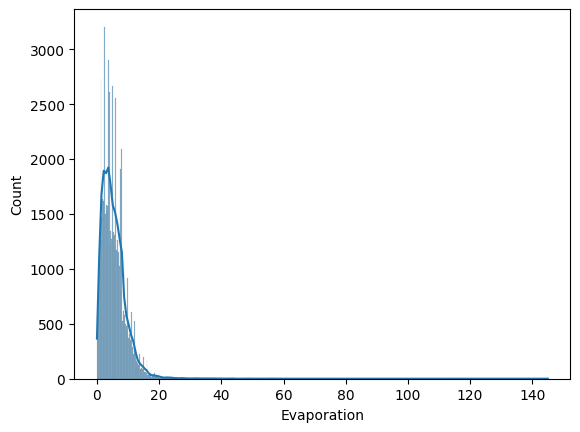

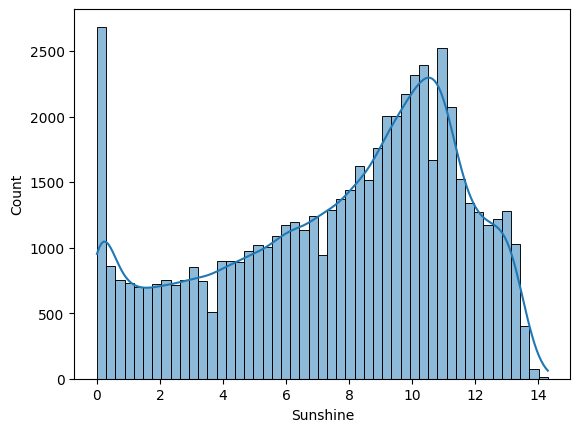

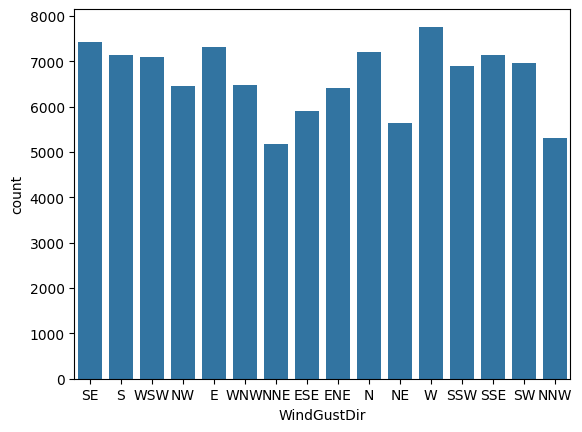

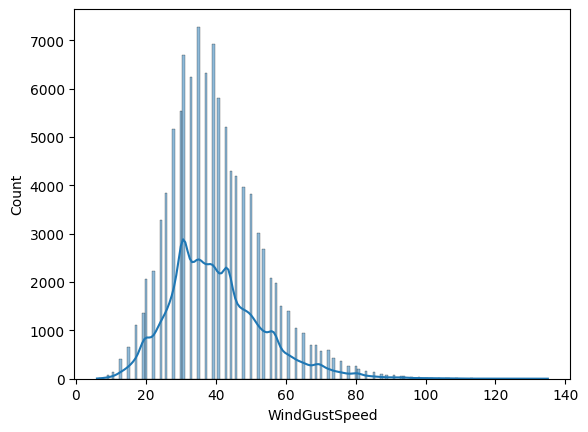

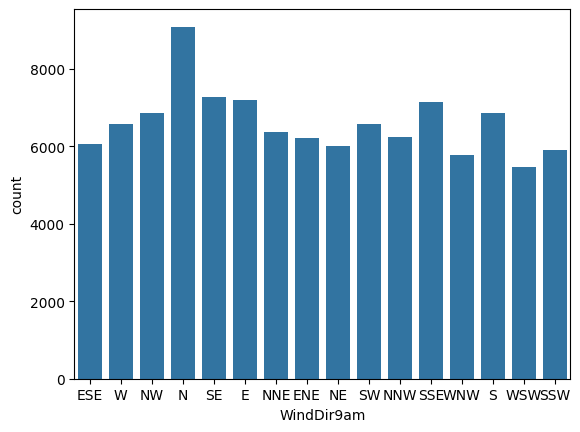

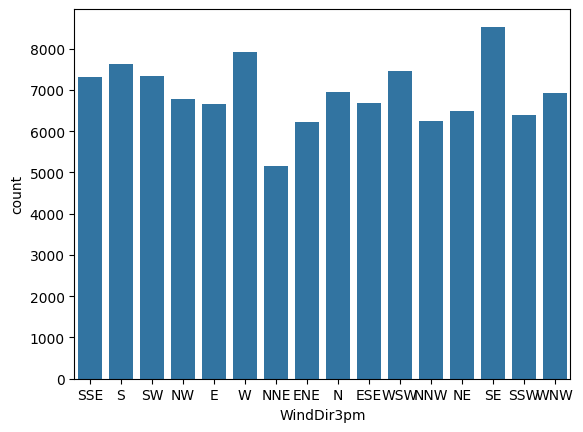

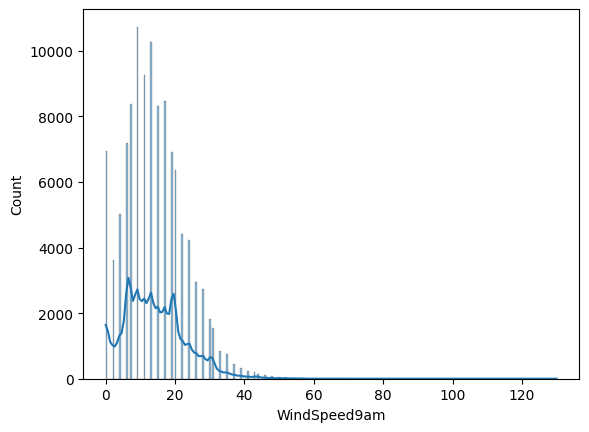

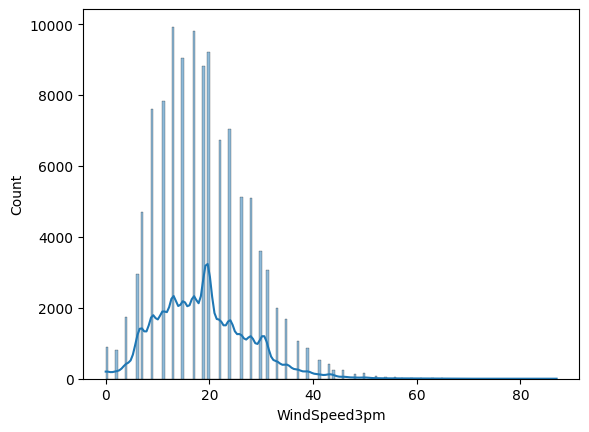

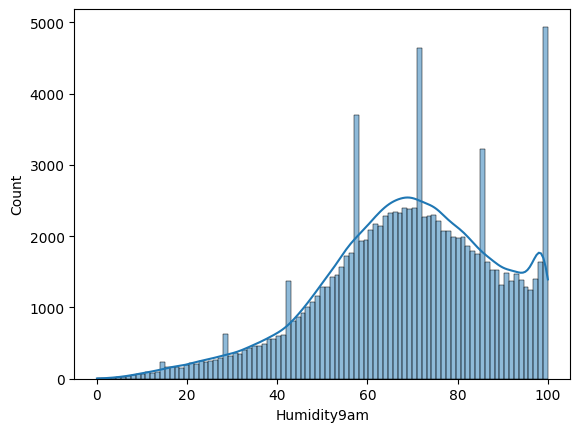

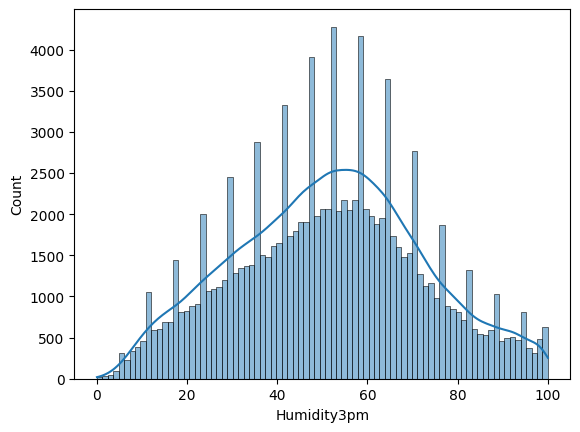

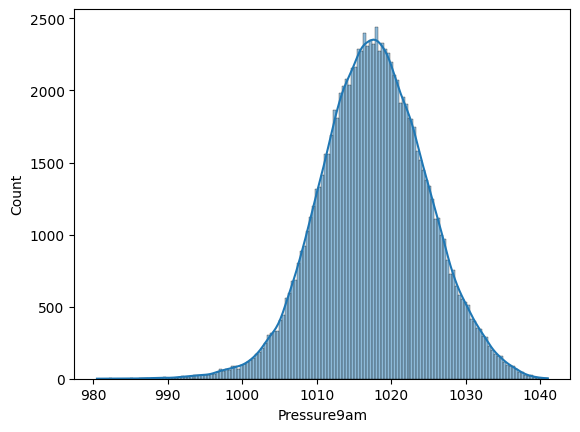

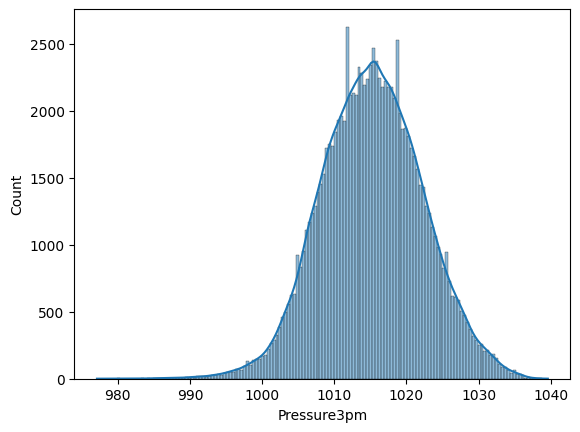

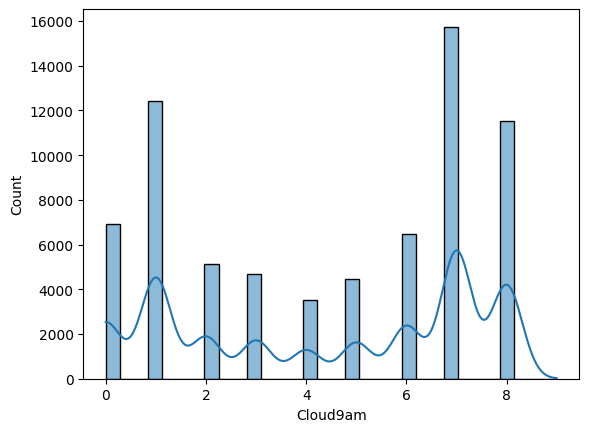

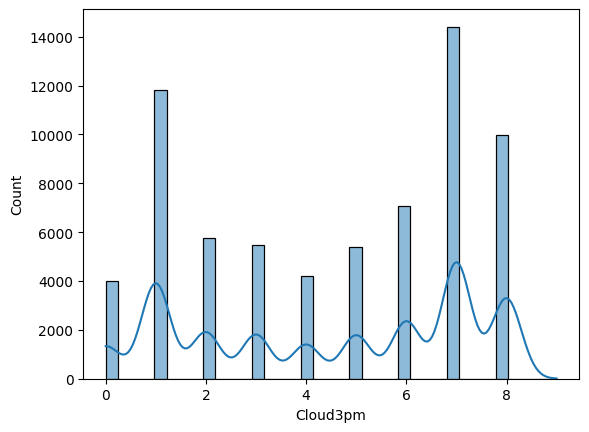

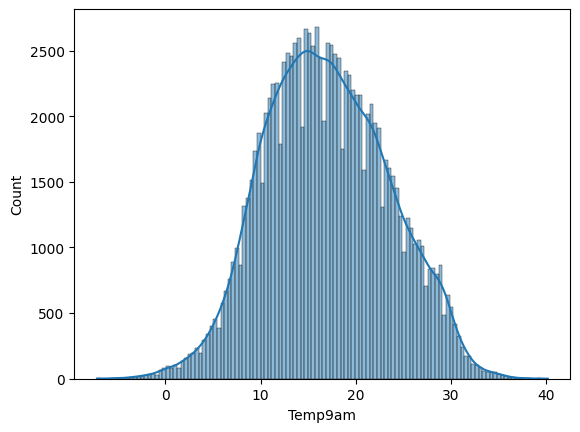

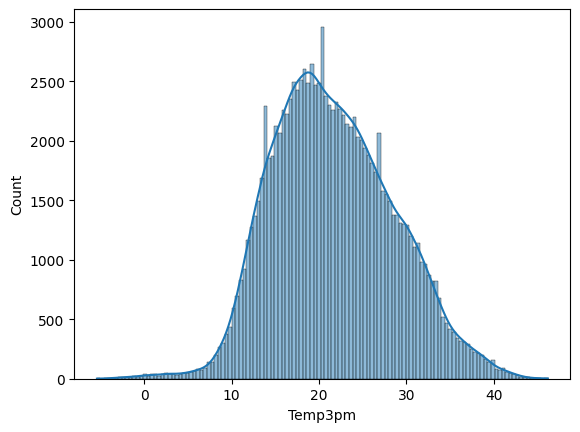

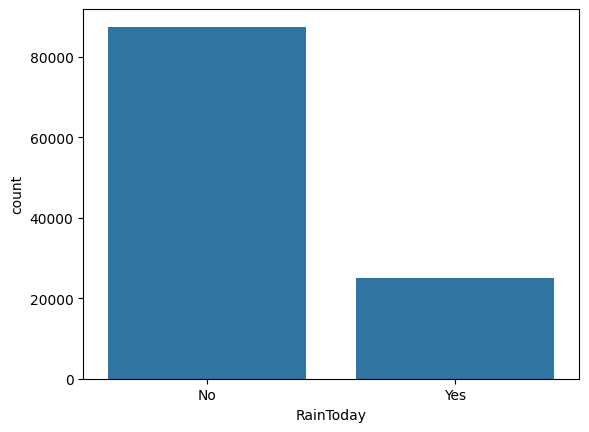

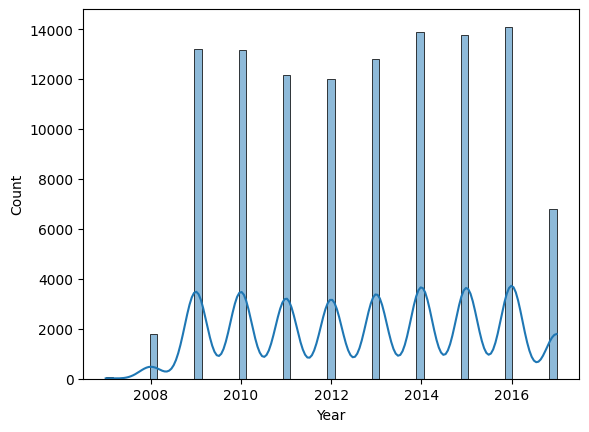

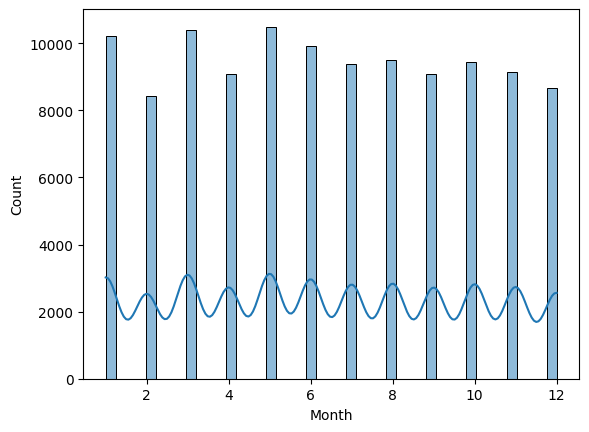

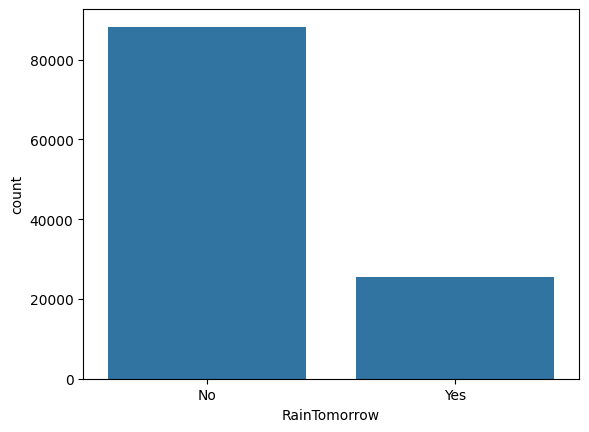

In [9]:
plt.figure(figsize=(15,15))
for column in rains.columns:
    is_cat = rains[column].dtype == 'object'
    if is_cat:
        sns.countplot(rains, x=column)
    else:
        sns.histplot(rains[column], kde=True)
    plt.show()

Text(0.5, 1.0, 'Disparidad de dias de lluvia en Australia 2007-2016')

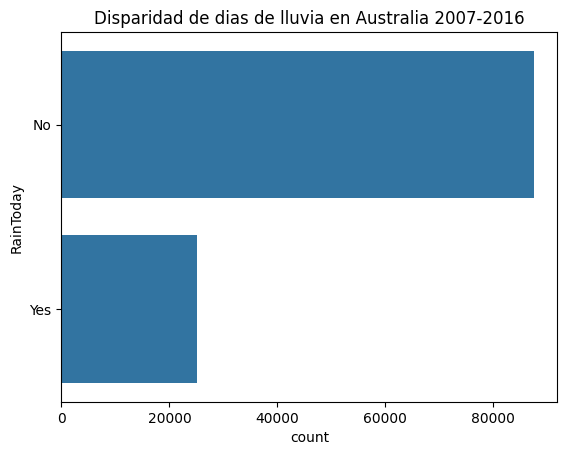

In [10]:
sns.countplot(rains['RainToday'])
plt.title('Disparidad de dias de lluvia en Australia 2007-2016')

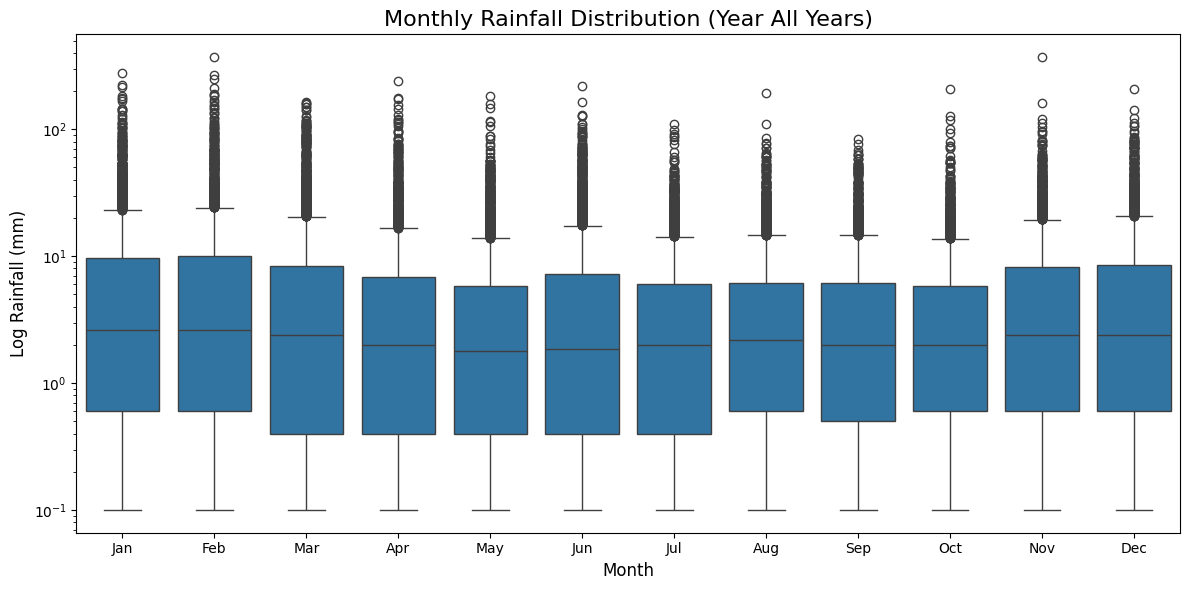

In [11]:
def monthly_rains_box(df, year=None):
    # Create a boxplot of 'Rainfall' by 'Month' for all years
    plt.figure(figsize=(12, 6))
    df_with_rains = df[df['Rainfall'] > 0]
    ax = sns.boxplot(x='Month', y='Rainfall', data=df_with_rains if year is None else df_with_rains[df['Date'].dt.year == year])
    ax.set_yscale('log')

    # Customize the plot
    plt.title(f'Monthly Rainfall Distribution (Year {year if year else "All Years" })', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Log Rainfall (mm)', fontsize=12)
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Show the plot
    plt.tight_layout()
    plt.show()

monthly_rains_box(rains)


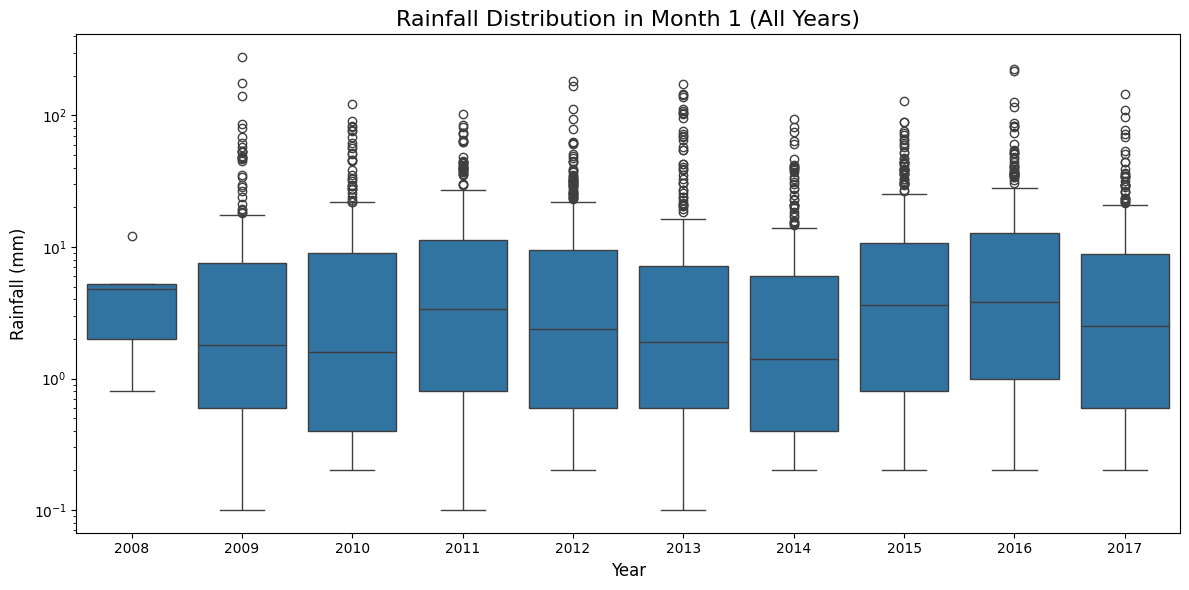

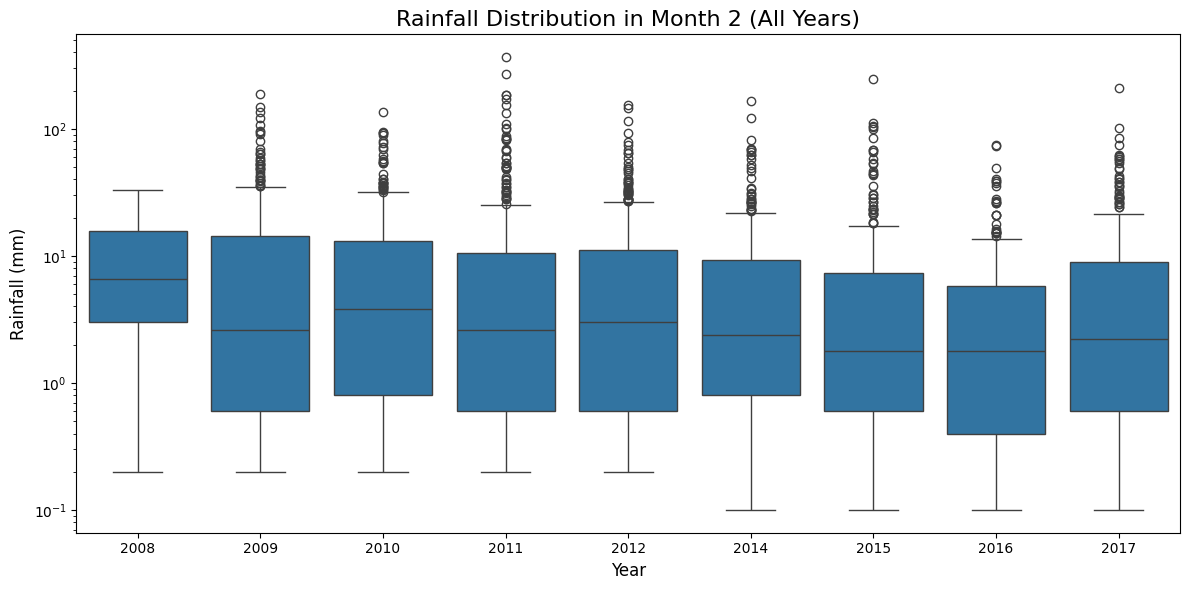

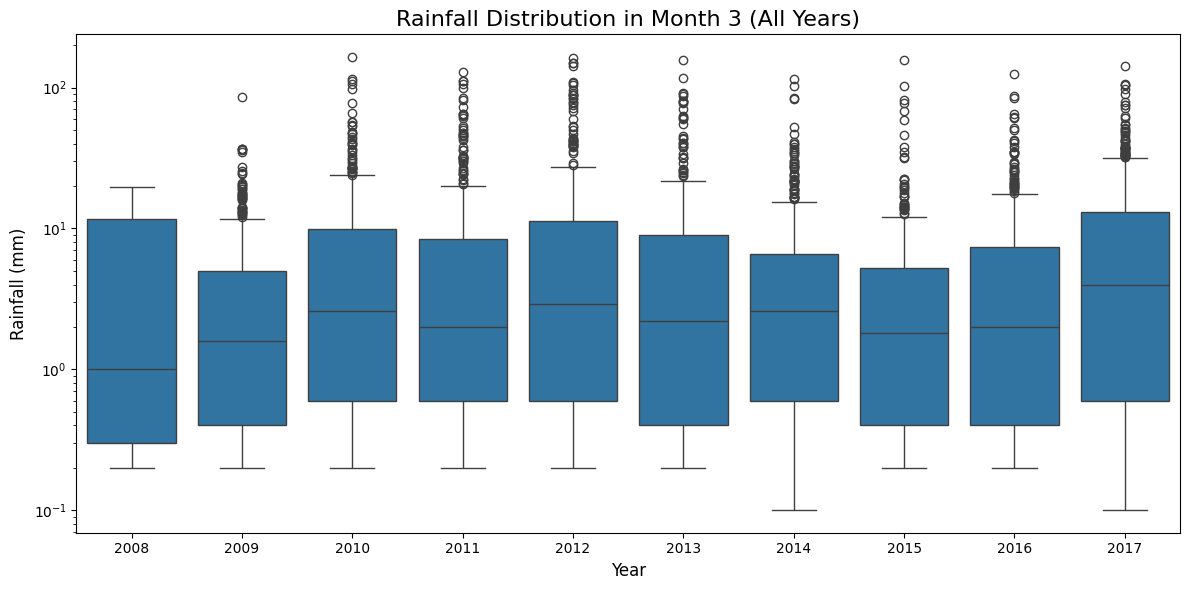

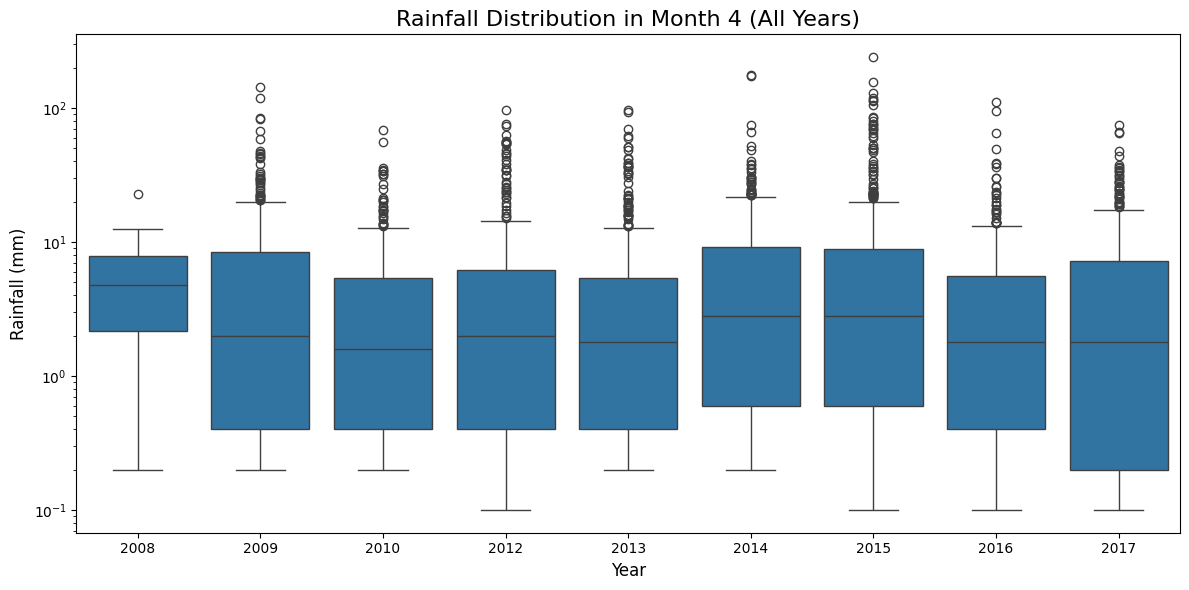

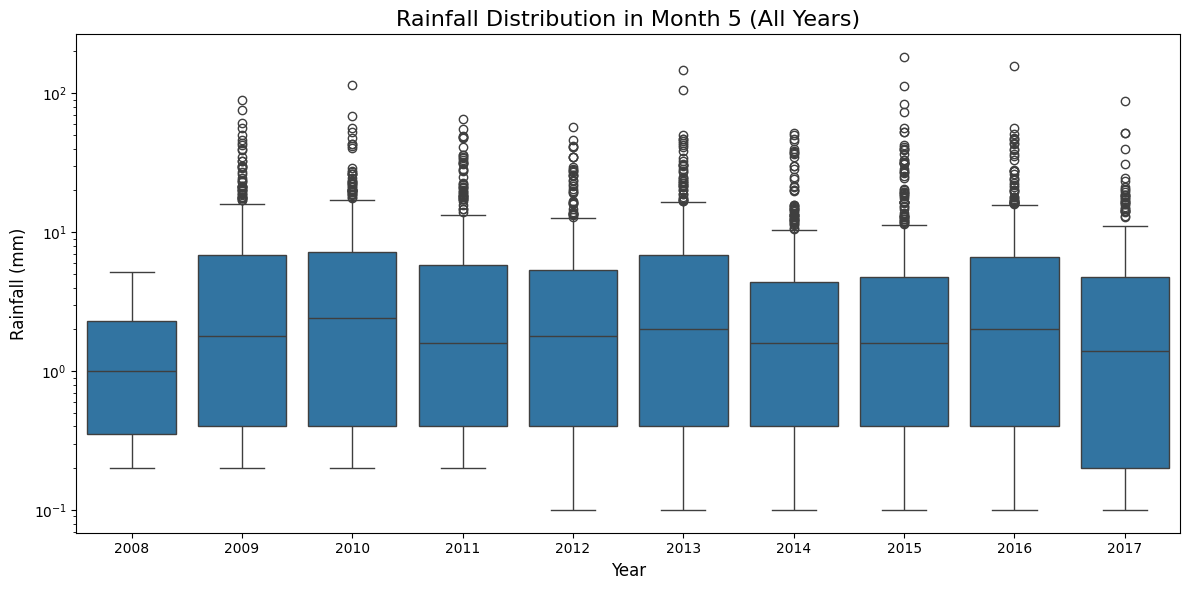

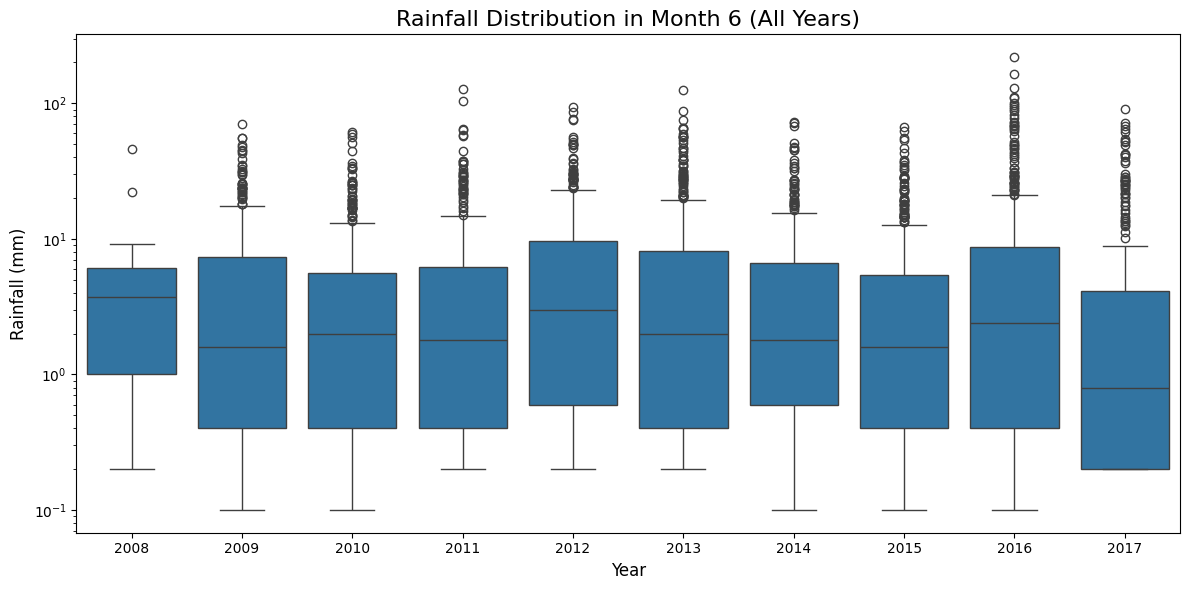

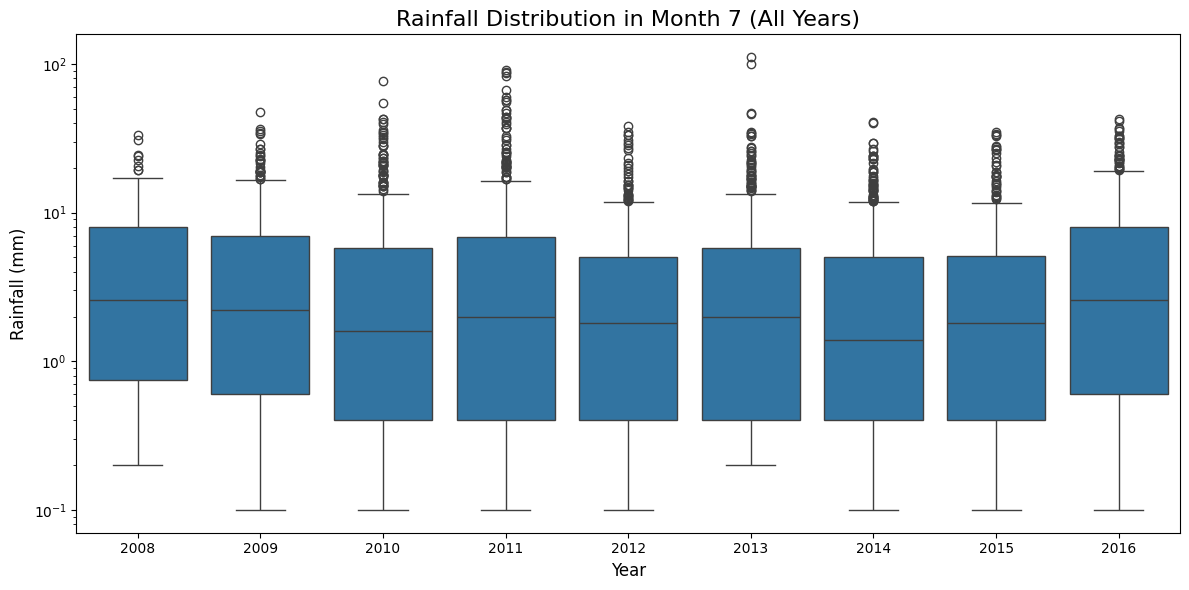

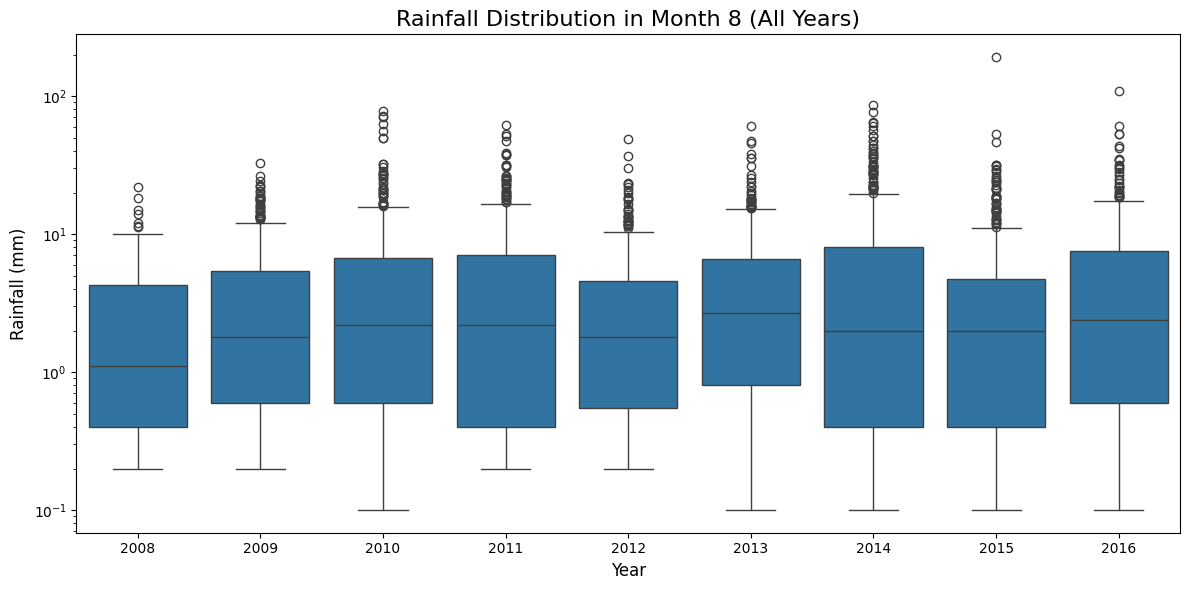

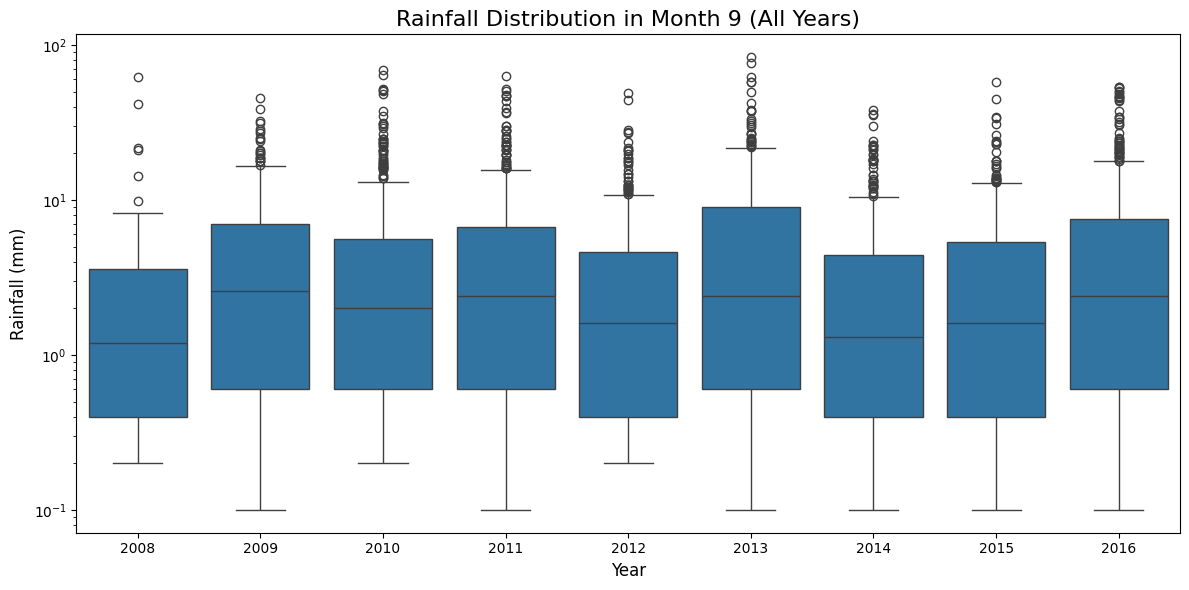

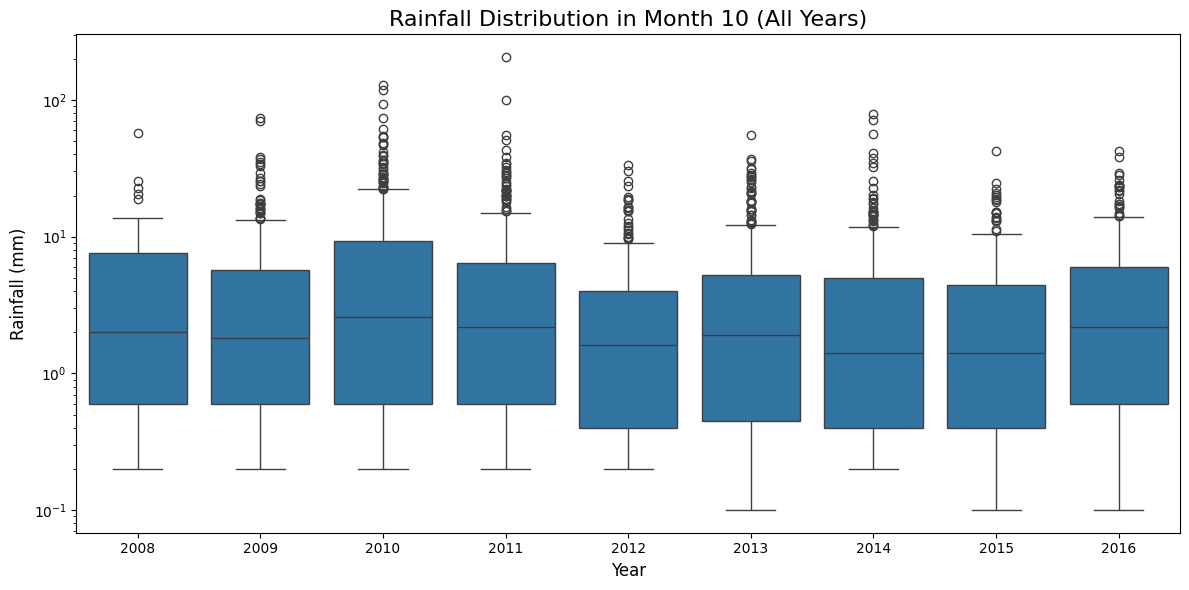

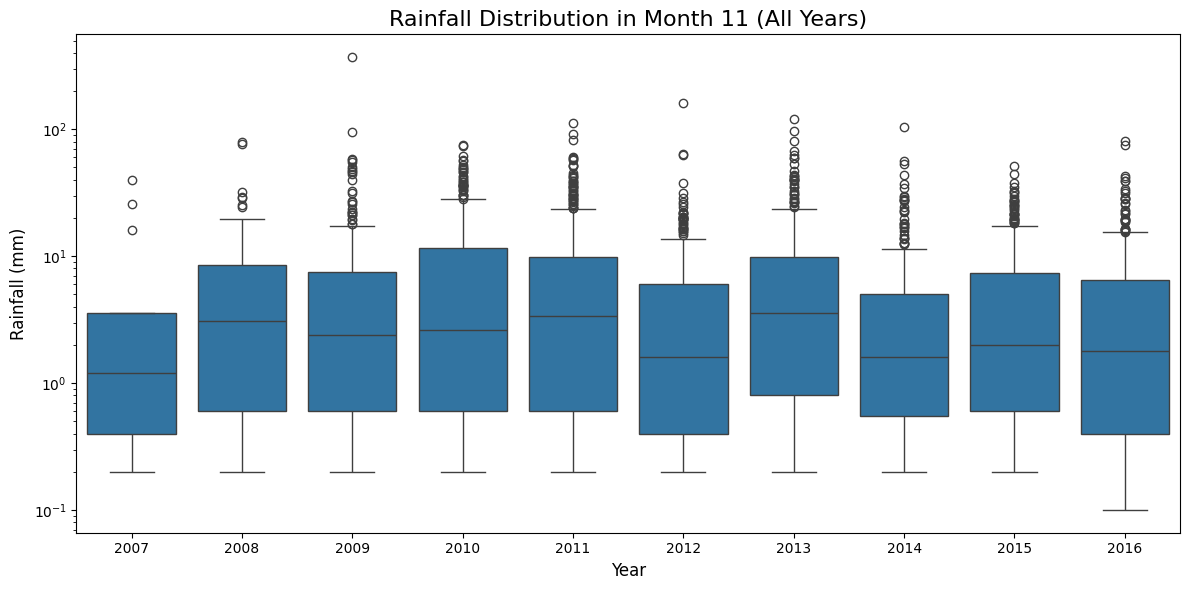

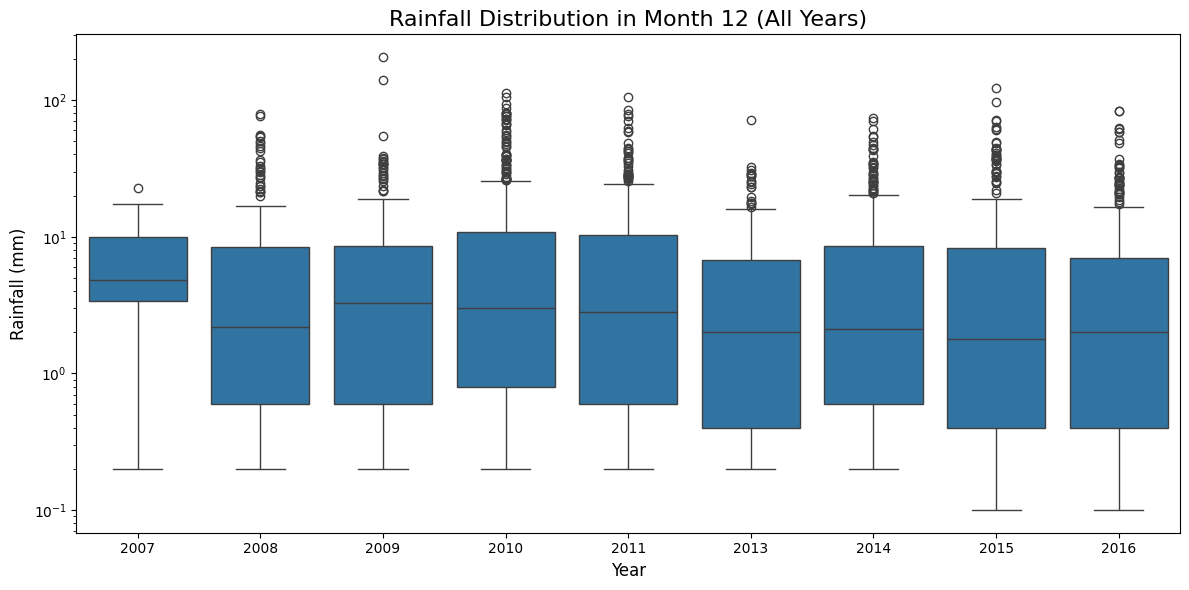

In [12]:
def historic_by_month_box(df, month):
    # Filter data to include only December of all years
    df_with_rains = df[df['Rainfall'] > 0]
    df_month = df_with_rains[(df_with_rains['Date'].dt.month == month) ]
    
    # Create a boxplot of 'Rainfall' for all Decembers
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='Year', y='Rainfall', data=df_month)
    ax.set_yscale('log')
    # Customize the plot
    plt.title(f'Rainfall Distribution in Month {month} (All Years)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
for i in range(1, 13):
    historic_by_month_box(rains, i)

In [14]:
rains['ConsecutiveRainDays'] = 0

# Track consecutive rainy days
consecutive_days = 0
for i in range(len(rains)):
    if rains.loc[i, 'RainToday'] > 0:
        consecutive_days += 1
    else:
        consecutive_days = 0
    rains.loc[i, 'ConsecutiveRainDays'] = consecutive_days


TypeError: '>' not supported between instances of 'str' and 'int'

Text(0, 0.5, 'Consecutive Rain Days')

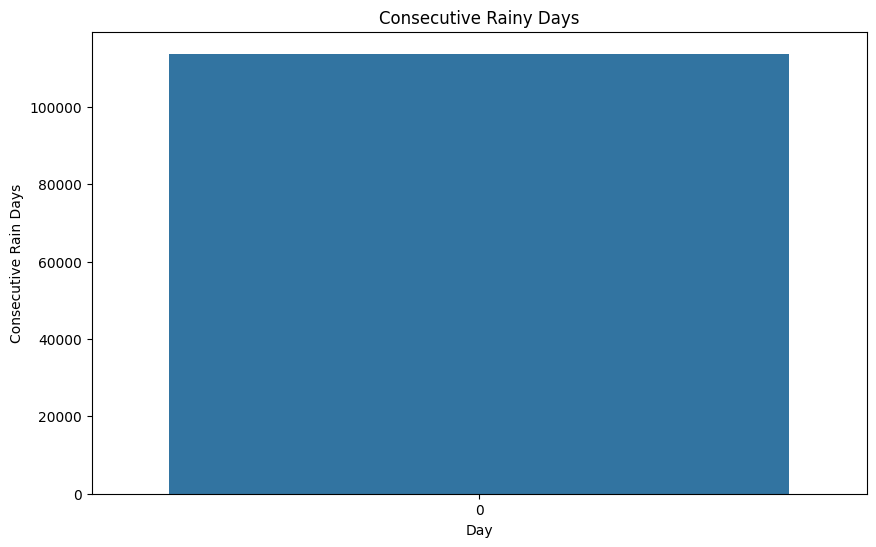

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    rains[['Date', 'ConsecutiveRainDays']].groupby('ConsecutiveRainDays').count().reset_index(),
    x='ConsecutiveRainDays',
    y='Date'
)
# ax.set_yscale('log')
ax.set_xticks(rains['ConsecutiveRainDays'].unique())

# Add labels and title
plt.title('Consecutive Rainy Days')

plt.xlabel('Day')
plt.ylabel('Consecutive Rain Days')


# Visualizations 

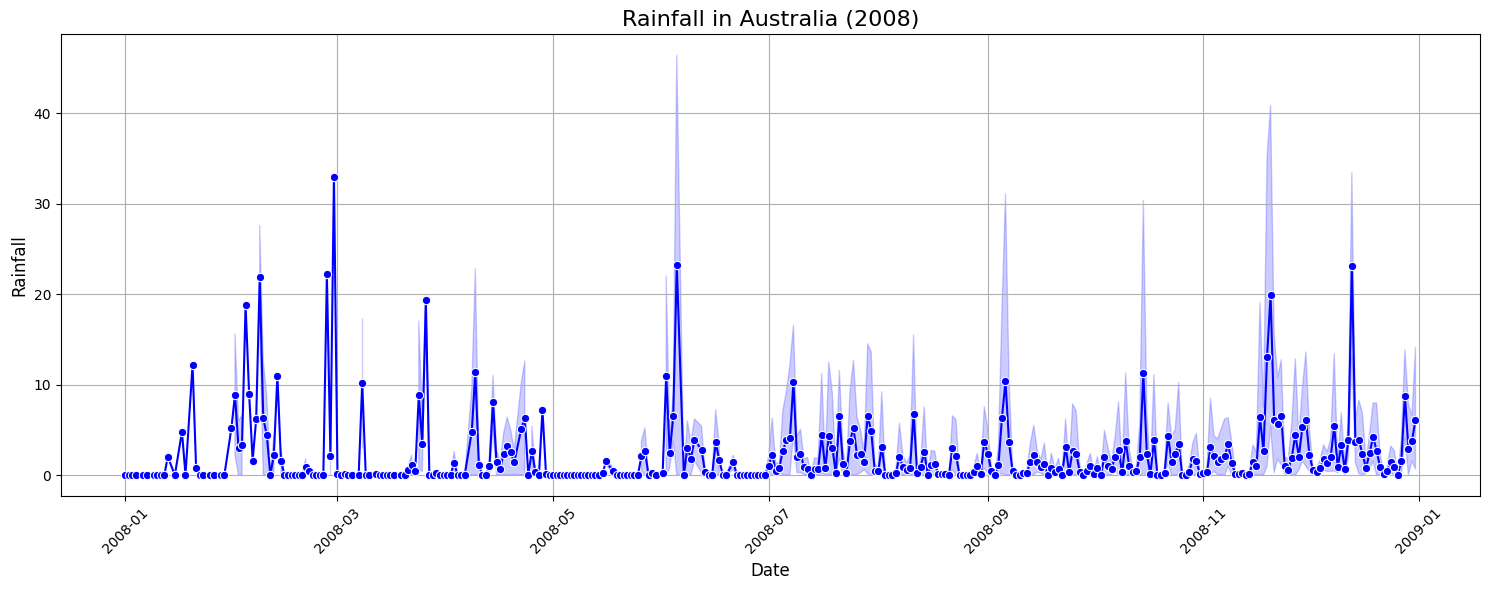

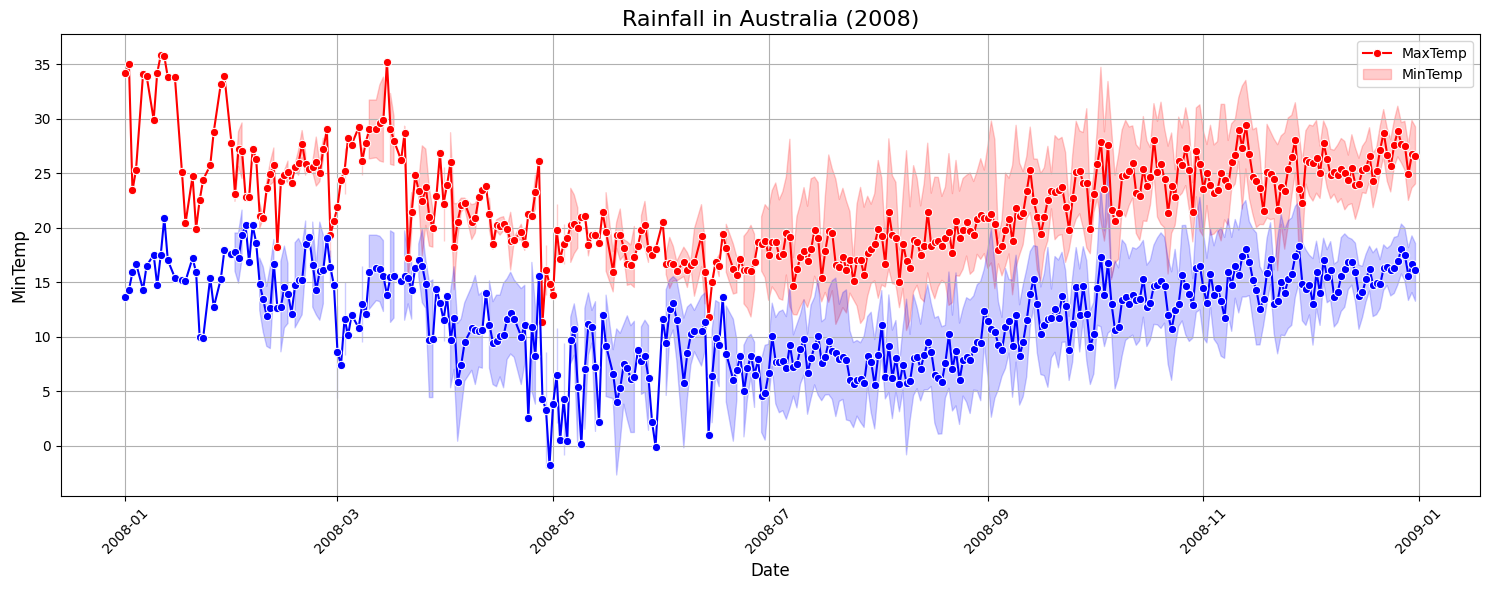

In [16]:
def plot_series(df, column, year, color='b'):
    first_year = rains[rains['Date'].dt.year == year]

    # Create a line plot of 'Rainfall' over time
    sns.lineplot(x='Date', y=column, data=first_year, marker='o', color=color)

    # Customize the plot
    plt.title(f'Rainfall in Australia ({year})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)  # Add grid

    # Show the plot


plt.figure(figsize=(15, 6))
plot_series(rains, 'Rainfall', 2008)
plt.show()
plt.figure(figsize=(15, 6))
plot_series(rains, 'MaxTemp', 2008, color='r')
plot_series(rains, 'MinTemp', 2008, color='b')
plt.legend(['MaxTemp', 'MinTemp'])
plt.show()


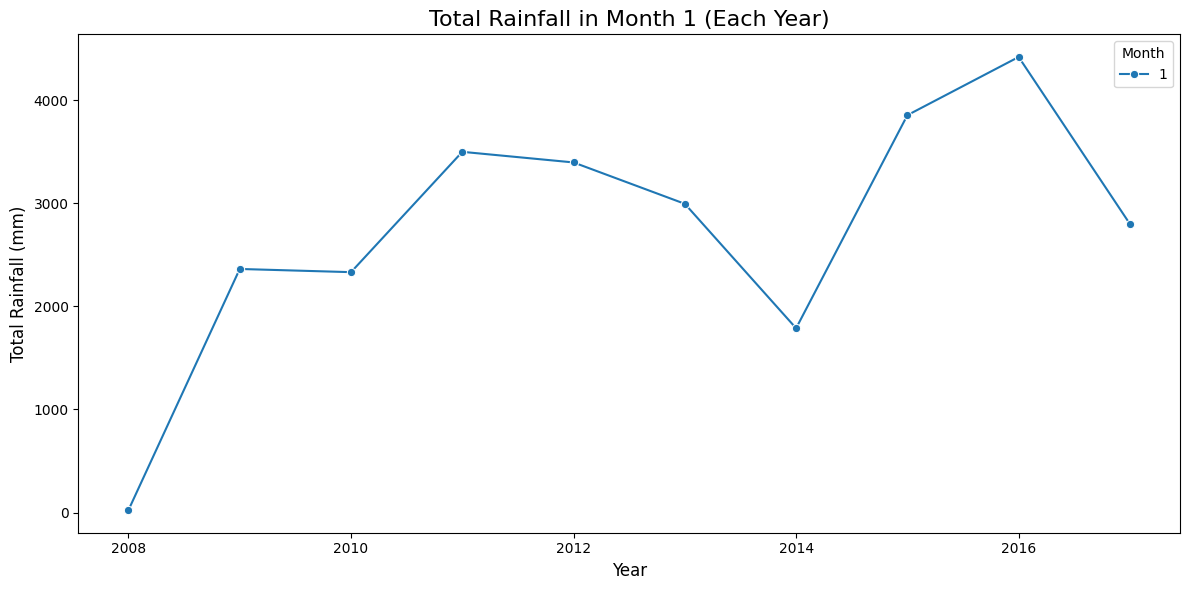

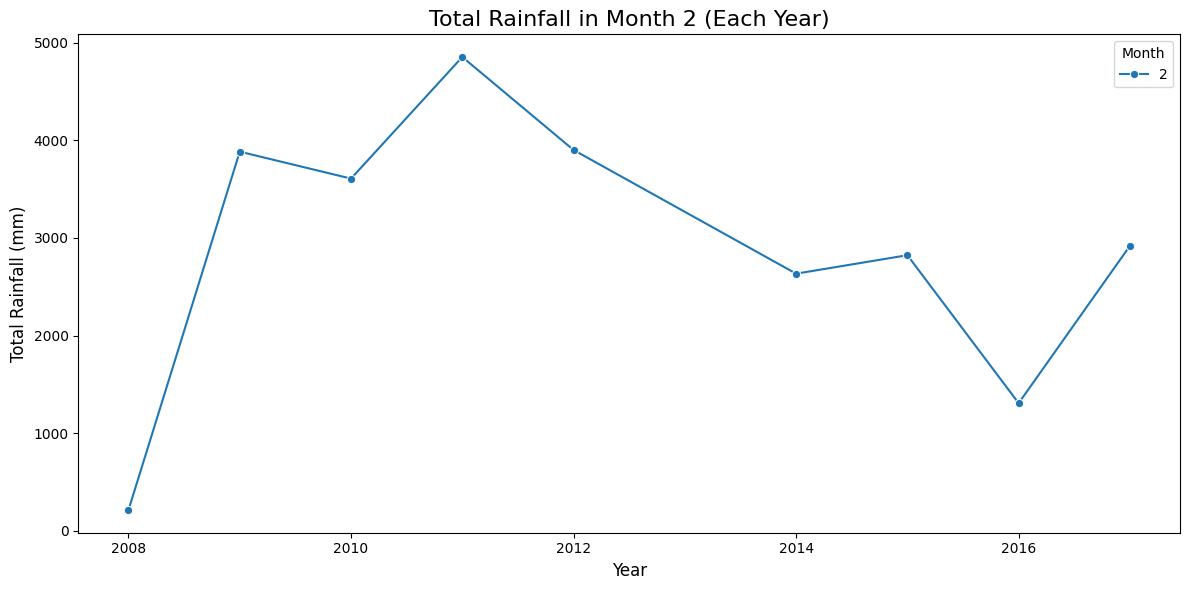

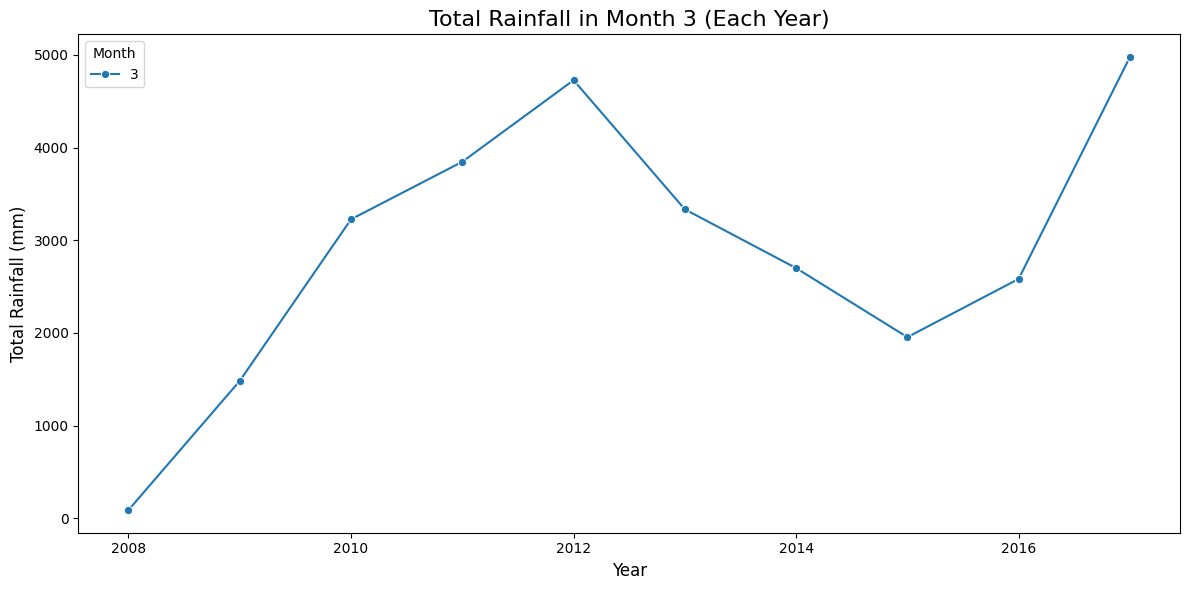

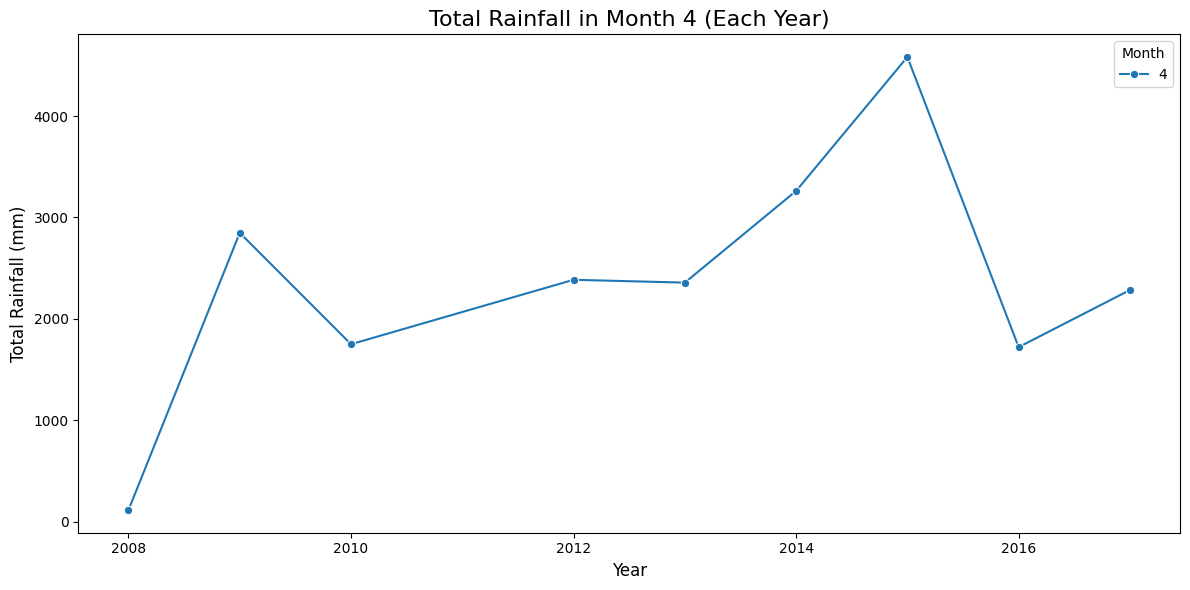

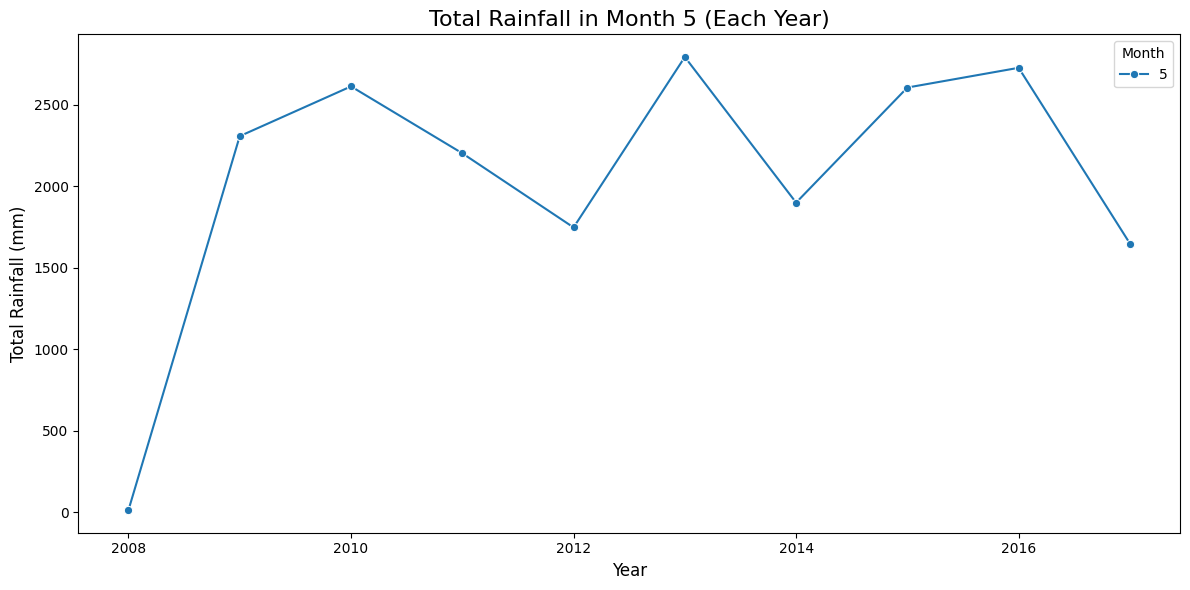

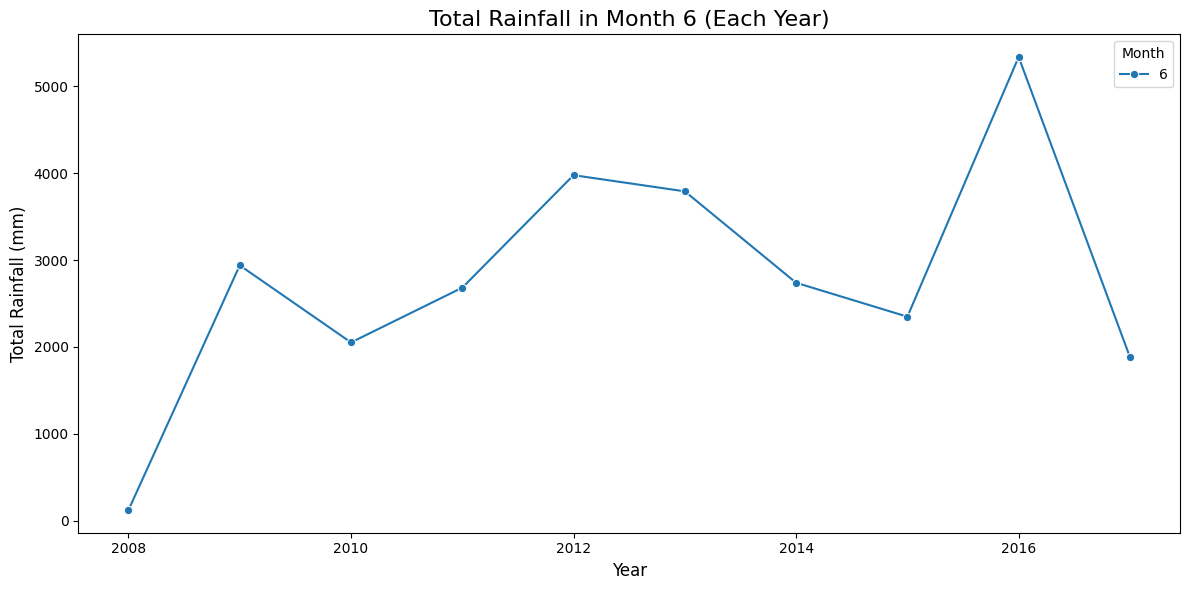

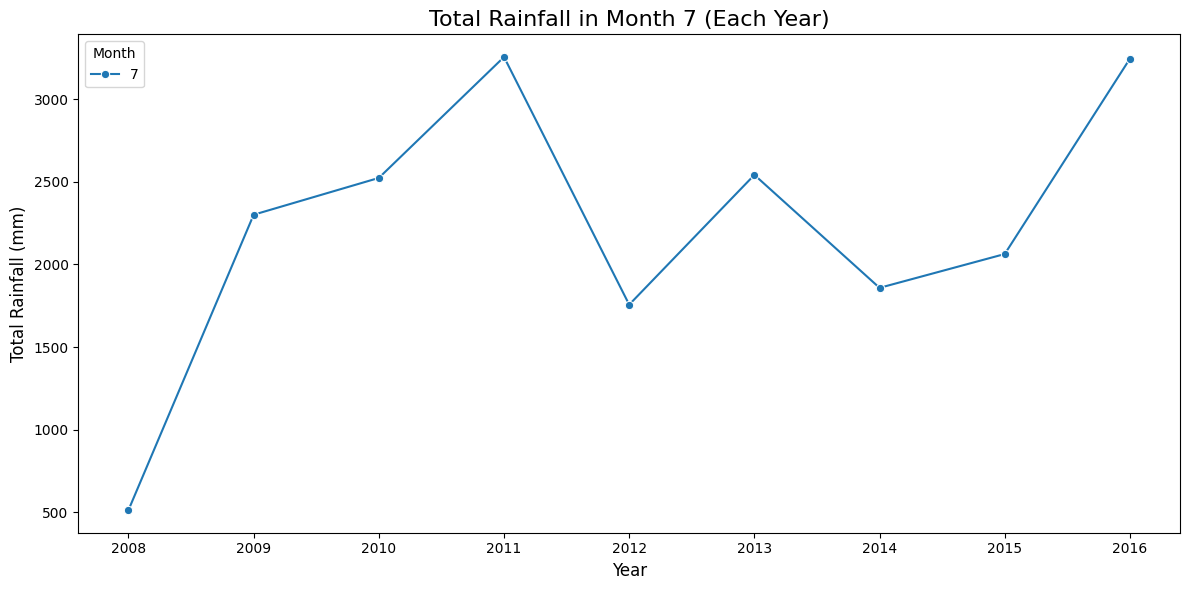

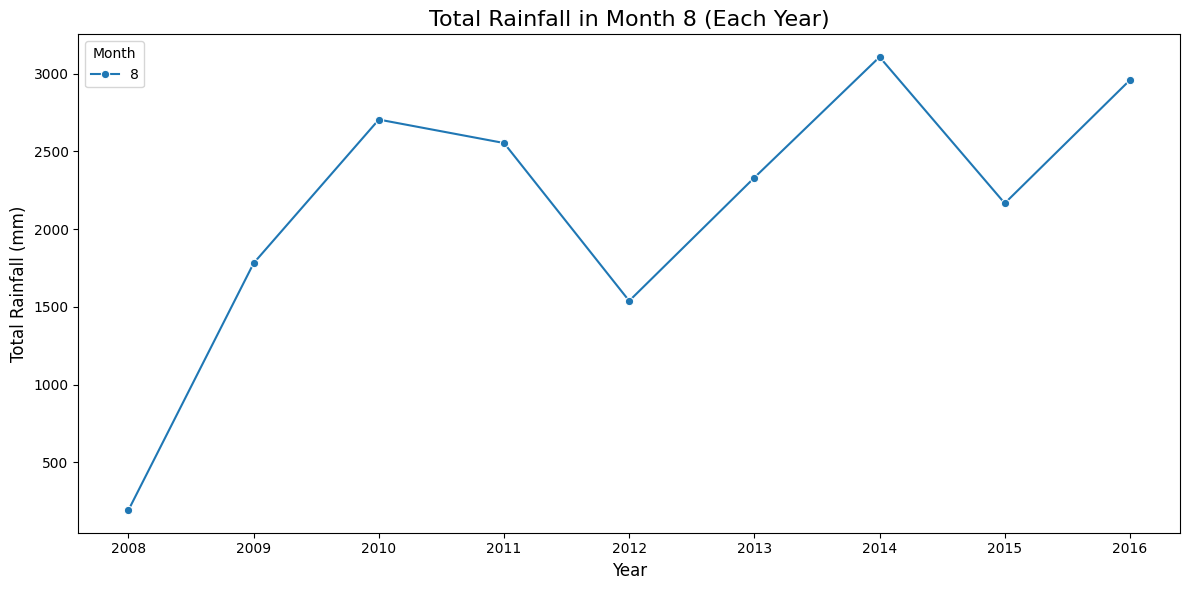

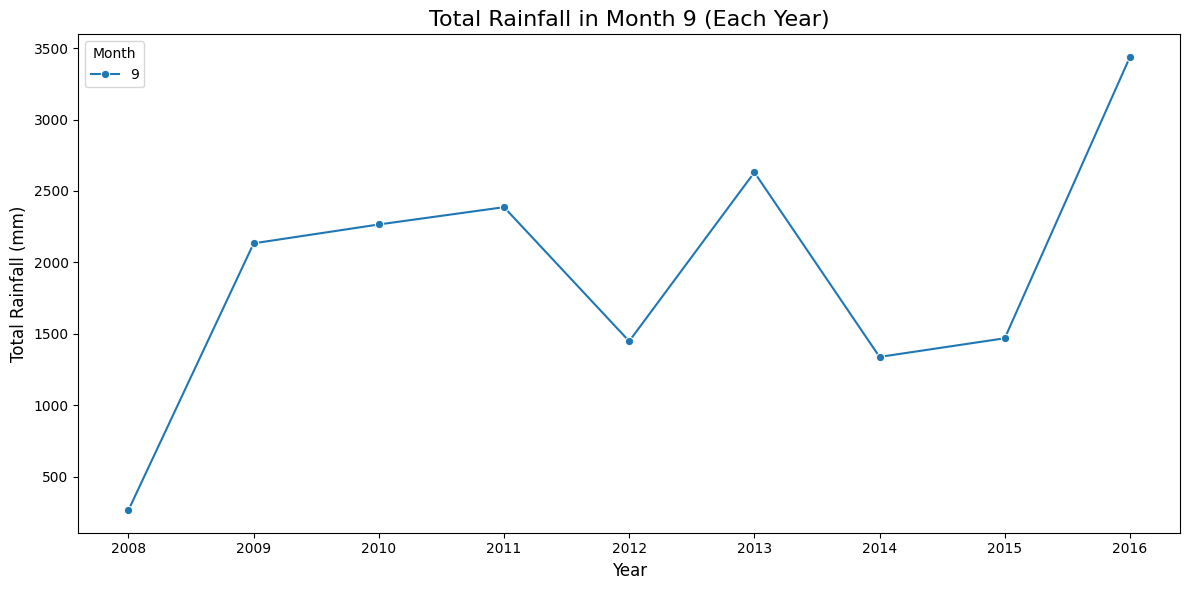

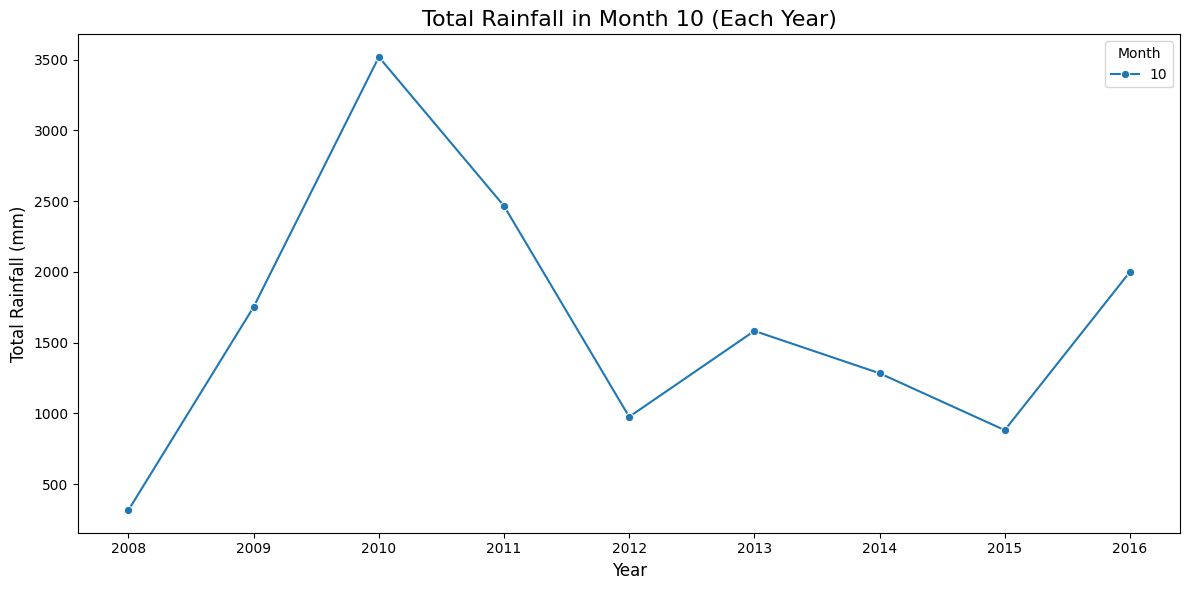

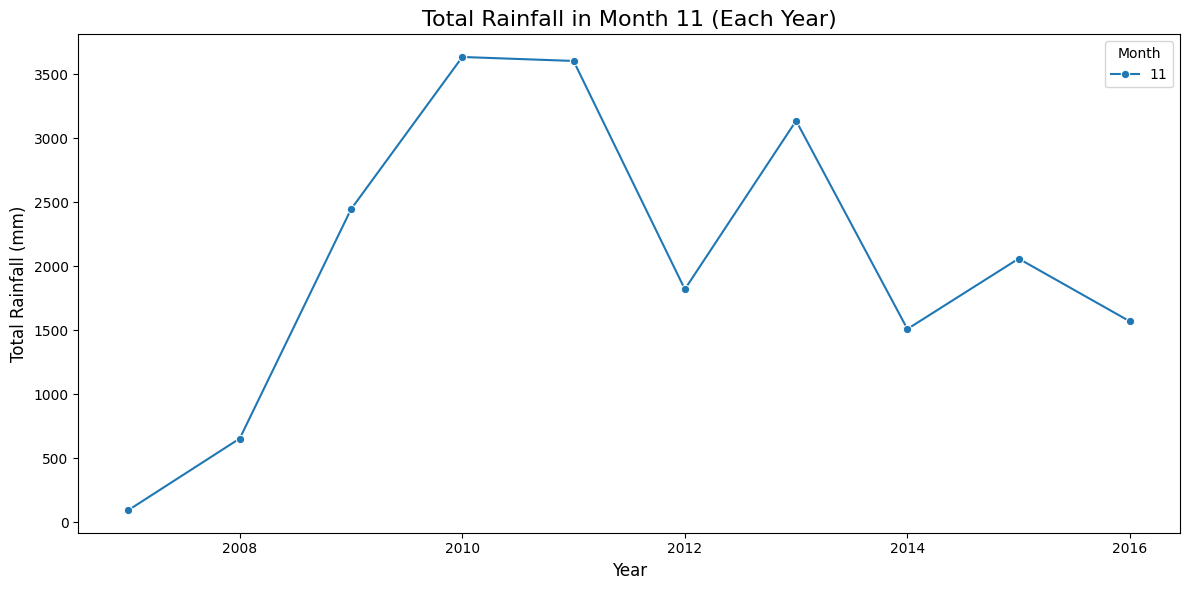

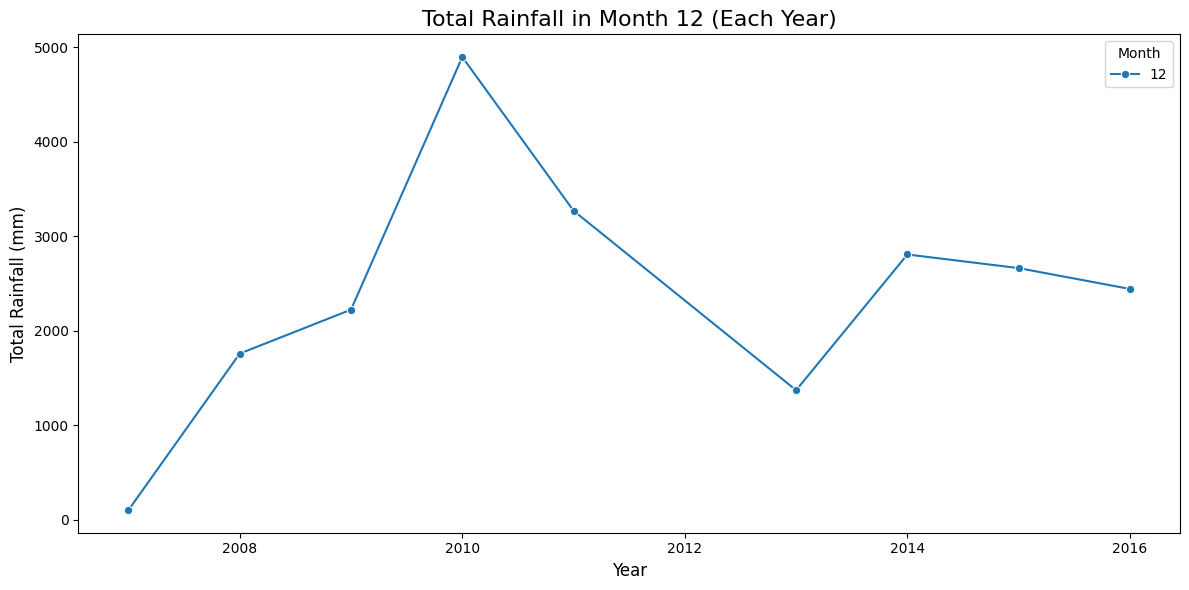

In [17]:
def total_rains_by_month_line(df, month):
    df_month = df[df['Date'].dt.month == month]

    # Group by year and calculate the total rainfall for each December
    total_rain_month = df_month.groupby(df_month['Date'].dt.year)['Rainfall'].sum().reset_index()

    # Create a line plot of the total rainfall for each December
    sns.lineplot(x='Date', y='Rainfall', data=total_rain_month, marker='o', label=f'{month}')

    # Customize the plot
    plt.title(f'Total Rainfall in Month {month} (Each Year)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.legend(title='Month')
    # Show the plot
    plt.tight_layout()


for i in range(1, 13):
    plt.figure(figsize=(12, 6))
    total_rains_by_month_line(rains, i)
    plt.show()

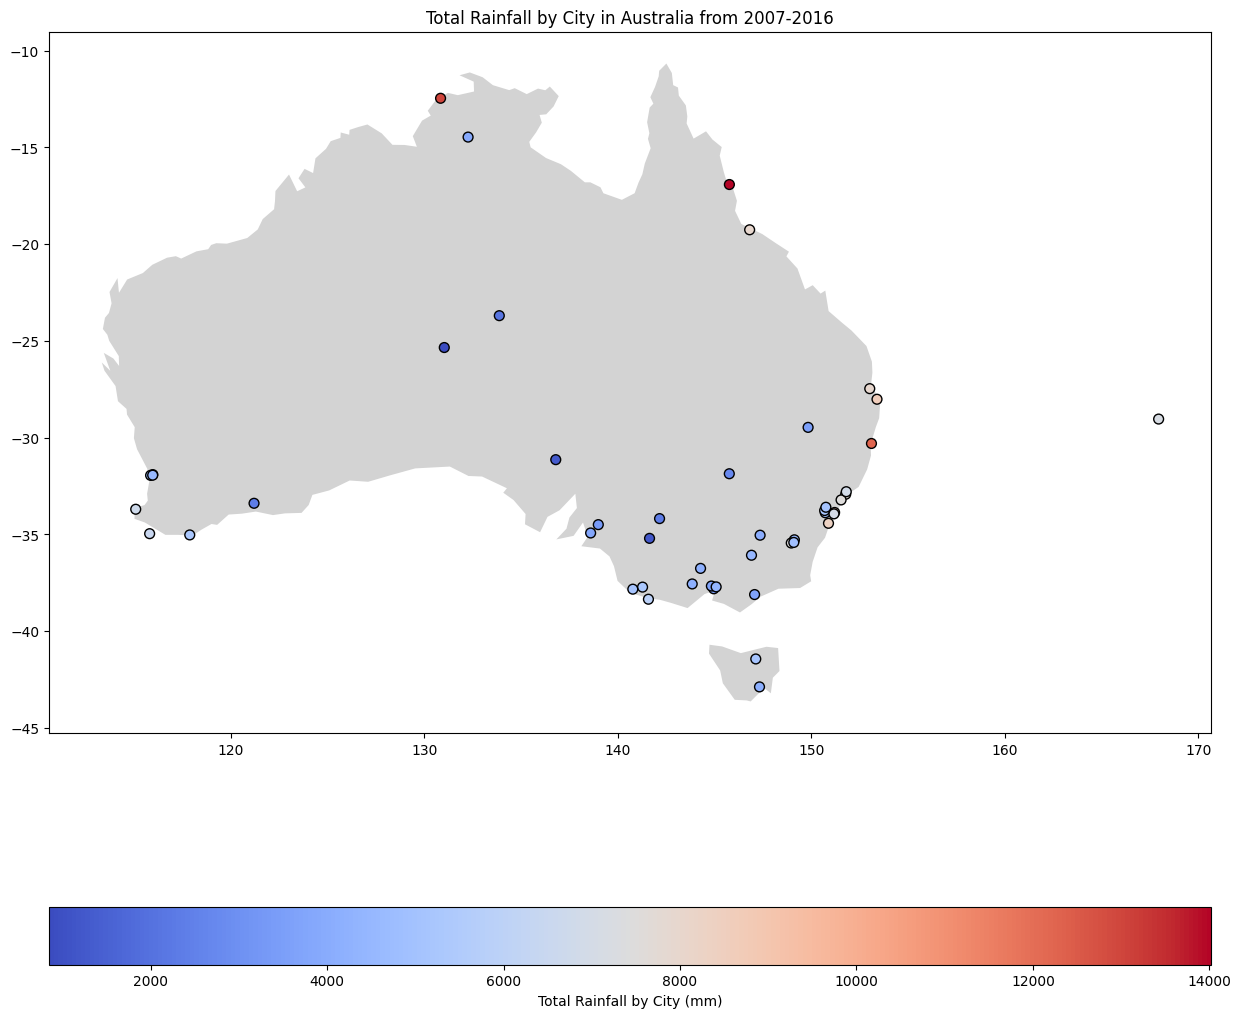

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Load the dataset
data = rains

# Drop rows with missing 'Rainfall' and 'Location' values
data_clean = data.dropna(subset=['Rainfall', 'Location'])

# Group by city (Location) and get total rainfall for each city
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Get unique city locations (we assume that each city is a point)
# For simplicity, let's use a hypothetical dataset for city coordinates
# For real-world use, you'd replace this with actual coordinates or a geospatial file

# Hypothetical city coordinates (latitude, longitude)
# Coordinates for the cities (replace with actual coordinates or use a geocoding API)


# Create GeoDataFrame with city coordinates and rainfall data
rainfall_by_city['Coordinates'] = rainfall_by_city['Location'].map(city_coords)
rainfall_by_city['geometry'] = rainfall_by_city['Coordinates'].apply(lambda x: Point(x[1], x[0]))
gdf = gpd.GeoDataFrame(rainfall_by_city, geometry='geometry')

# Load a map of Australia
world = gpd.read_file('../data/110m_cultural/ne_110m_admin_0_countries.shp')
australia = world[world['NAME'] == "Australia"]

# Plot the rainfall by city on a map
fig, ax = plt.subplots(figsize=(15, 15))
australia.plot(ax=ax, color='lightgrey')

# Plot cities as points on the map, color-coded by total rainfall
gdf.plot(ax=ax, markersize=50, column='Rainfall', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Total Rainfall by City (mm)", 'orientation': "horizontal"},
         edgecolor='black',  # Set marker edges to black for contrast
         linewidth=1  # Increase edge width for "bold" appearance)
         )
# Set title and show plot
plt.title('Total Rainfall by City in Australia from 2007-2016')
plt.show()


<Axes: >

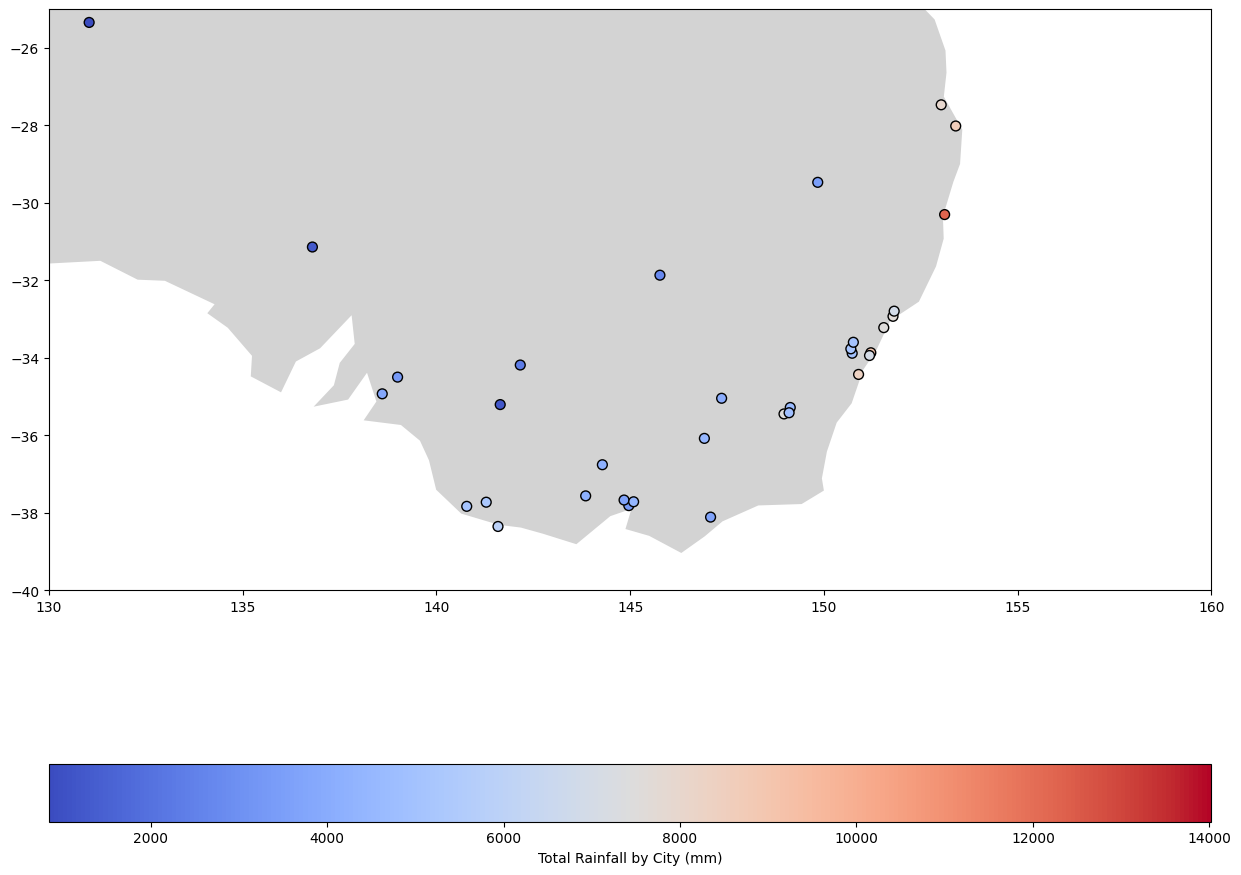

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(130, 160)
ax.set_ylim(-40, -25)
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, column='Rainfall', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Total Rainfall by City (mm)", 'orientation': "horizontal"},
         edgecolor='black',
         linewidth=1)

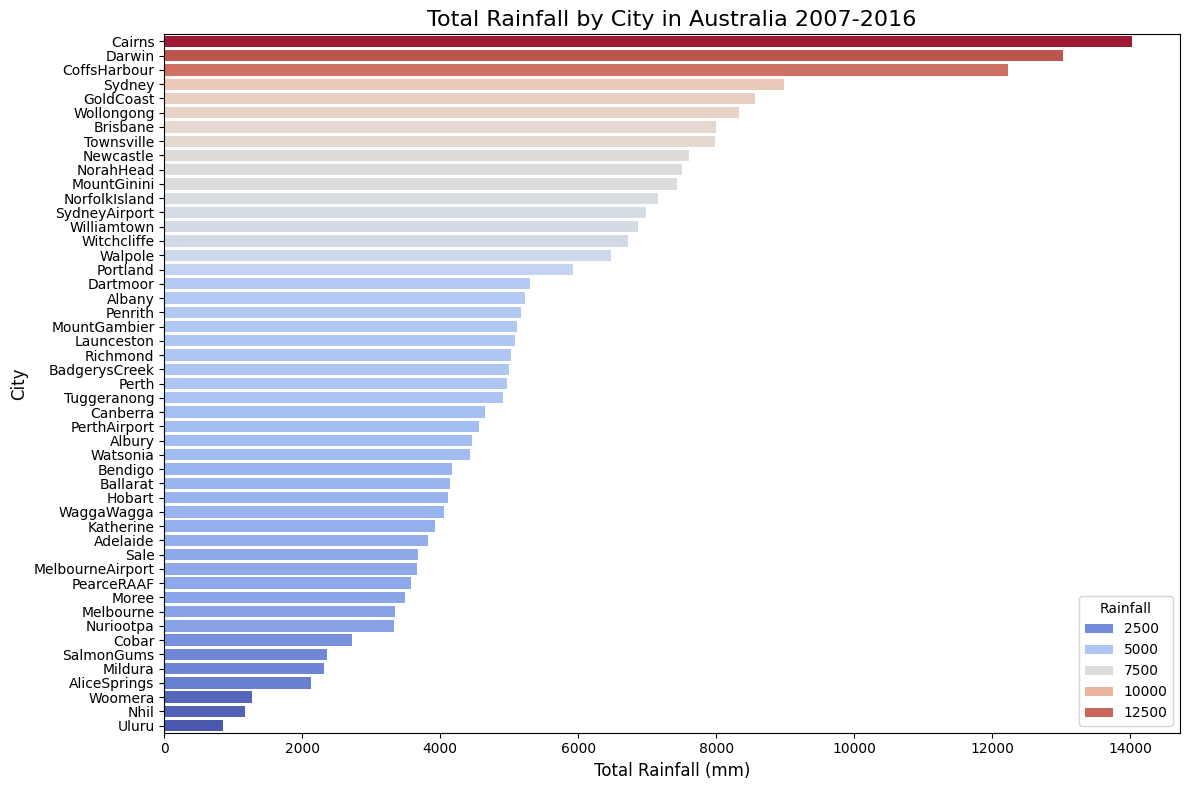

In [20]:
data_clean = rains.dropna(subset=['Rainfall', 'Location'])

# Group by city (Location) and sum rainfall
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Sort by total rainfall for better visualization
rainfall_by_city = rainfall_by_city.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall',
    y='Location',
    data=rainfall_by_city,
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Total Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

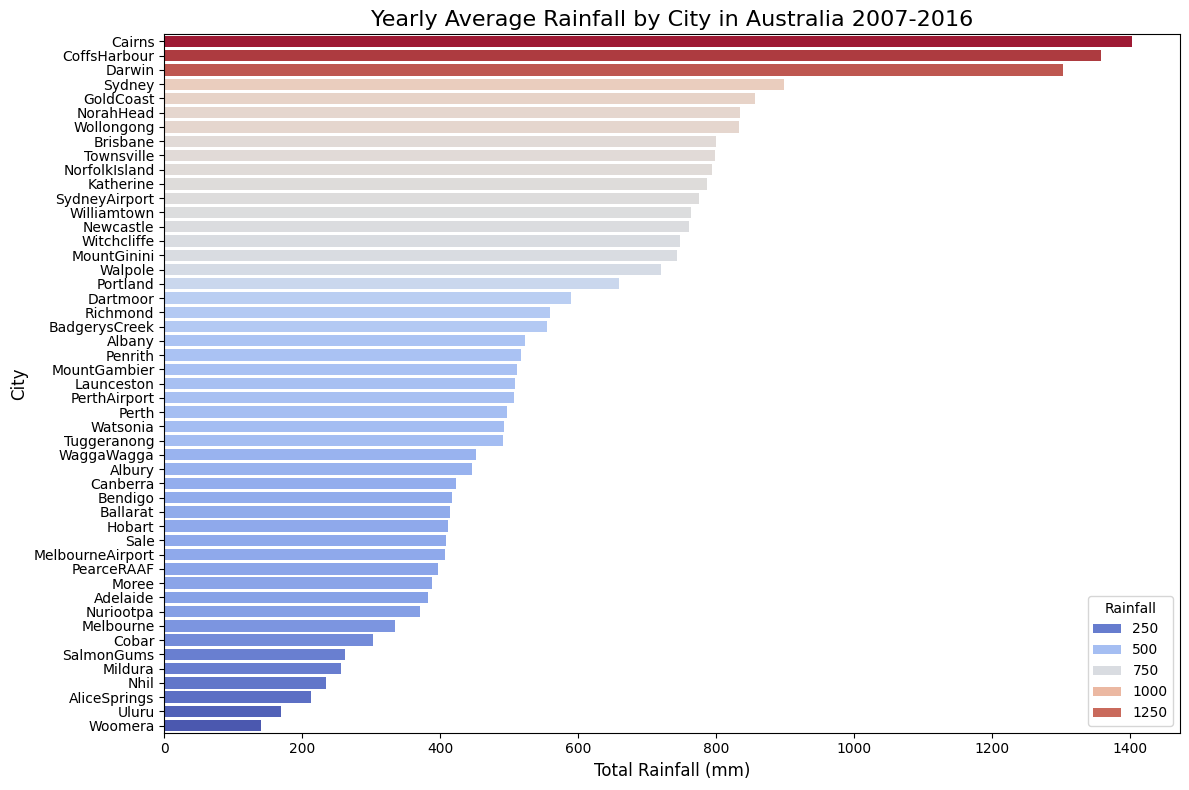

In [27]:
# data_clean['year'] = data_clean['Date'].dt.year
group_by_loc_year = data_clean.groupby(['Location', 'year'])['Rainfall'].sum().groupby('Location').mean().reset_index()

rainfall_by_city = group_by_loc_year.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall',
    y='Location',
    data=rainfall_by_city,
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Yearly Average Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
# Data cleaning

In [23]:
# Tratamiento para nulls: RainTomorrow 

# Al ser la variable target, no hay mucho para hacer. Se procede a eliminarlas.

In [24]:
rains[rains['RainTomorrow'].isnull()]

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, Year, Month, RainTomorrow, ConsecutiveRainDays]
Index: []

[0 rows x 26 columns]

In [25]:
rains.dropna(subset=['RainTomorrow'], inplace=True)
assert(len(rains[rains['RainTomorrow'].isnull()]) == 0)

In [28]:
nulls_by_row = rains.isnull().sum(axis=1)
nulls_by_row.describe()

count    113754.000000
mean          2.230058
std           2.467382
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          20.000000
dtype: float64

<Axes: ylabel='Year'>

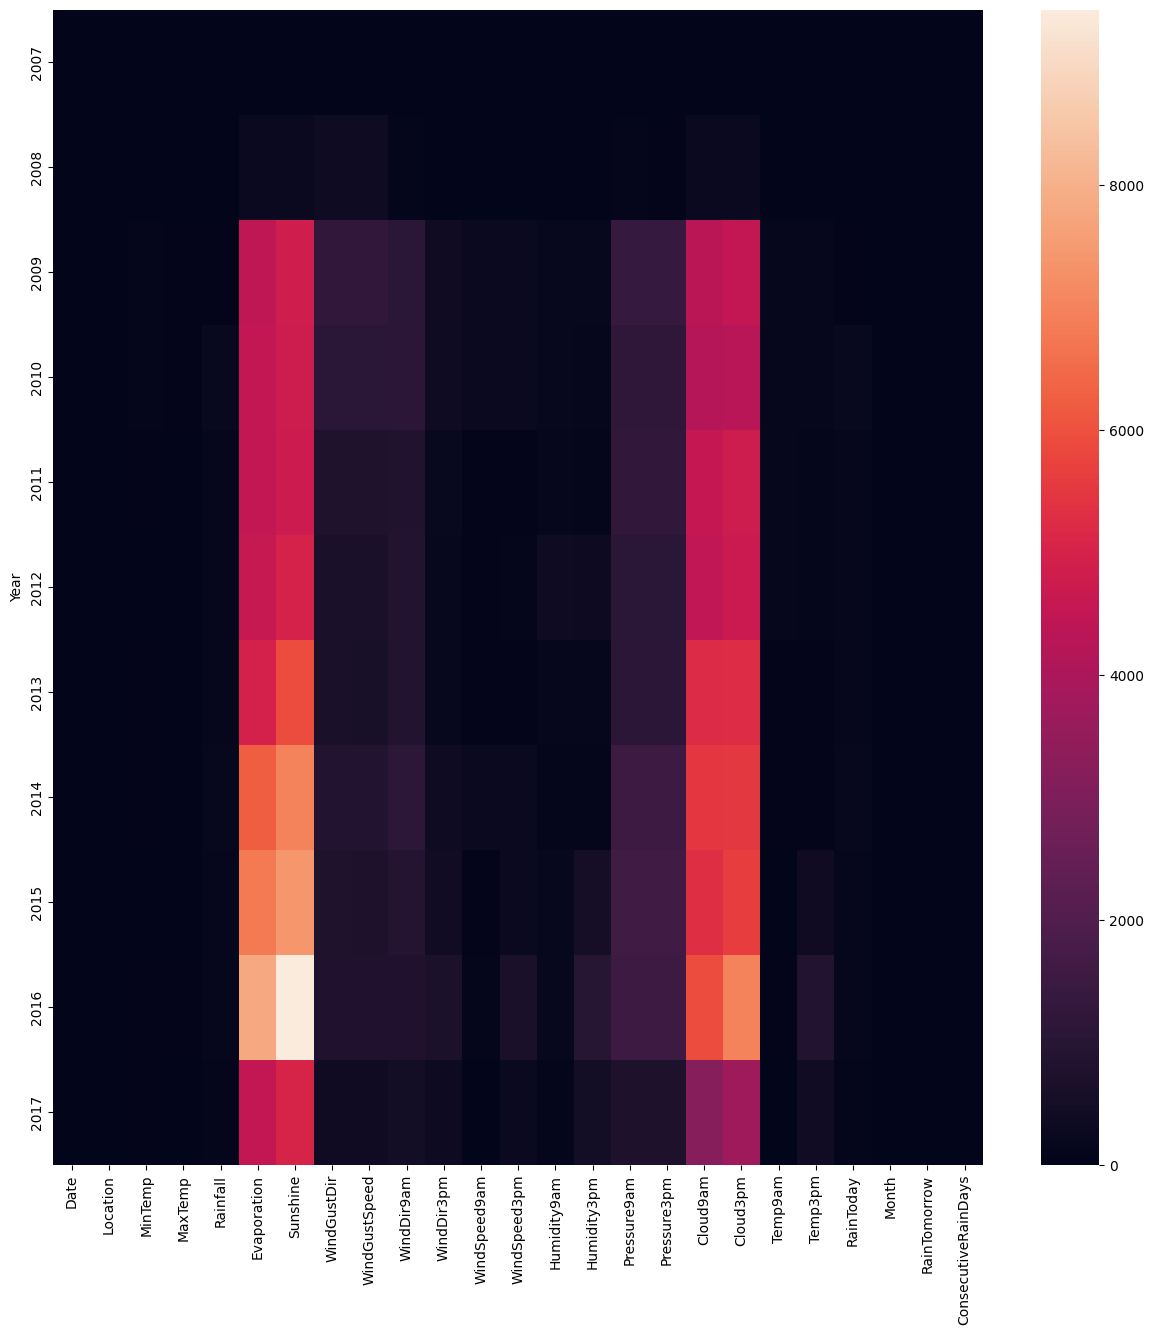

In [29]:
rains['Year'] = rains['Date'].dt.year
rains['Month'] = rains['Date'].dt.month
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Year').apply(lambda x: x.isnull().sum(), include_groups=False))

<Axes: ylabel='Month'>

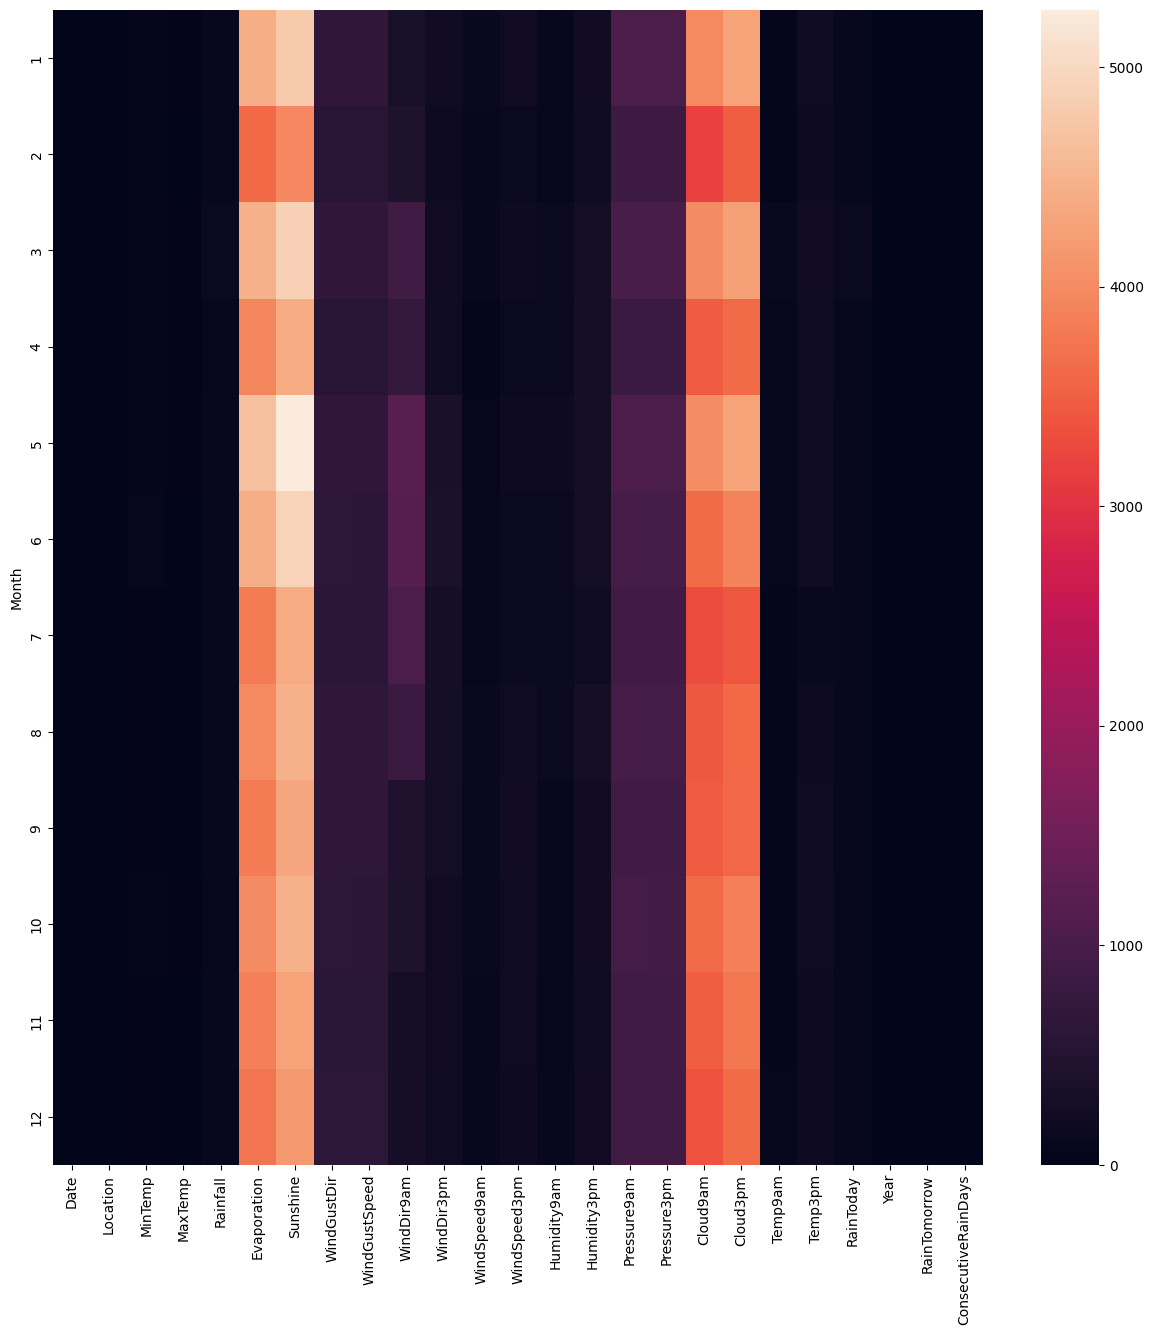

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Month').apply(lambda x: x.isnull().sum(), include_groups=False))

<Axes: ylabel='Location'>

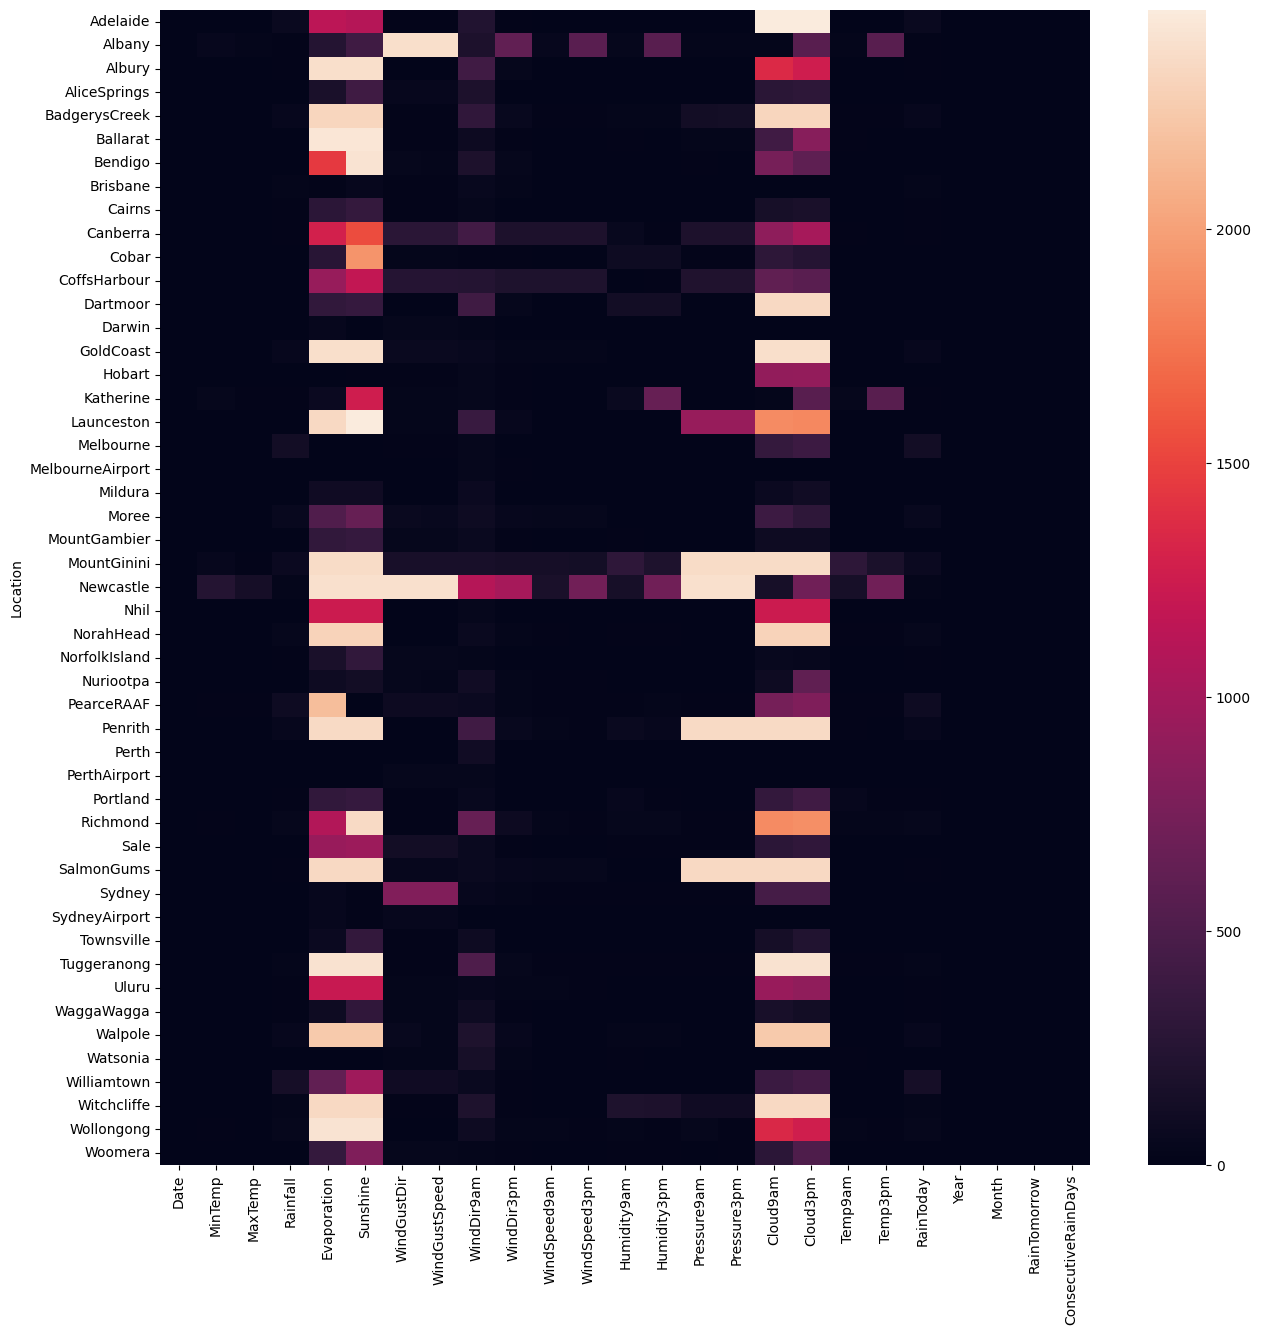

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(rains.groupby('Location').apply(lambda x: x.isnull().sum(), include_groups=False), annot=False)

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

def is_null(value):
    if isinstance(value, str):
        return value == None
    if isinstance(value, pd.core.series.Series) or isinstance(value, np.ndarray):
        return len(value) == 0
    else:
        return np.isnan(value)

def impute_row_hierarchicaly(
        row,
        features,
        grouped_2_levels,
        grouped_1_level,
        global_values,
        l1_group_key = "Location",
        l2_group_key = "Month"
):
    for c in features:
        imputation_value = grouped_2_levels.loc[(row[l1_group_key], row[l2_group_key])][c]
        if is_null(imputation_value):
            imputation_value = grouped_1_level.loc[row[l1_group_key]][c]
        if is_null(imputation_value):
            imputation_value = global_values[c]
        row[c] = imputation_value
    return row


class HierarchicalImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.global_mean = None
        self.mean_by_location = None
        self.mean_by_location_month = None

        self.global_top = None
        self.top_by_location = None
        self.top_by_location_month = None

        self.mean_adjusted = ["Rainfall", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "MinTemp", "MaxTemp"]
        self.top_adjusted = ["WindGustDir", "WindDir9am", "WindDir3pm"]



    def fit(self, X):
        group_l1_l2 = lambda features: X[["Location", "Month"] + features].groupby(["Location", "Month"])
        group_l1 = lambda features: X[["Location"] + features].groupby(["Location"])

        self.mean_by_location_month = group_l1_l2(self.mean_adjusted).mean()
        self.mean_by_location = group_l1(self.mean_adjusted).mean()
        self.global_mean = X[self.mean_adjusted].mean()

        def mode(x):
            m = x.mode()
            if isinstance(x, pd.core.series.Series) or isinstance(x, np.ndarray):
                if len(m) == 0:
                    return np.nan
                else:
                    return m[0]
            else:
                return m
        self.top_by_location_month = group_l1_l2(self.top_adjusted).agg(mode)
        self.top_by_location = group_l1(self.top_adjusted).agg(mode)
        self.global_top = X[self.top_adjusted].agg(mode)
        return self

    def transform(self, X):
        X_copy = X.copy()
        mean_imputer = lambda row: impute_row_hierarchicaly(row, self.mean_adjusted,  self.mean_by_location_month, self.mean_by_location, self.global_mean, l1_group_key = "Location", l2_group_key = "Month")
        top_imputer = lambda row: impute_row_hierarchicaly(row, self.top_adjusted, self.top_by_location_month, self.top_by_location, self.global_top, l1_group_key = "Location", l2_group_key = "Month")
        imputer = lambda row: top_imputer(mean_imputer(row))
        return X_copy.apply(imputer, axis=1)


# Imputacion y escalamiento

In [33]:
imputer = HierarchicalImputer()
imputer.fit(rains)


In [34]:
rains_imp = imputer.transform(rains)

In [35]:
rains_imp["RainTodayNull"] = rains_imp["RainToday"].isnull().astype(np.int64)
rains_imp["RainToday"] = rains_imp["RainToday"].fillna(0)

In [36]:
rains_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 103642 to 122308
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 113754 non-null  datetime64[ns]
 1   Location             113754 non-null  object        
 2   MinTemp              113754 non-null  float64       
 3   MaxTemp              113754 non-null  float64       
 4   Rainfall             113754 non-null  float64       
 5   Evaporation          113754 non-null  float64       
 6   Sunshine             113754 non-null  float64       
 7   WindGustDir          113754 non-null  object        
 8   WindGustSpeed        113754 non-null  float64       
 9   WindDir9am           113754 non-null  object        
 10  WindDir3pm           113754 non-null  object        
 11  WindSpeed9am         113754 non-null  float64       
 12  WindSpeed3pm         113754 non-null  float64       
 13  Humidity9am   

In [37]:
coordinates = pd.read_csv("../data/worldcities.csv")
coordinates["Location"] = coordinates["city"]
coordinates.drop(columns=["city"], inplace = True)
coordinates = coordinates[coordinates["country"] == "Australia"]

In [38]:
rains_imp = rains_imp.merge(coordinates[["Location", "lat", "lng"]], right_on="Location", left_on="Location", how="left")

In [39]:

#Fill missing latitudes using city_coords
rains_imp.loc[rains_imp["lat"].isnull(), "lat"] = rains_imp.loc[
    rains_imp["lat"].isnull(), "Location"
].apply(lambda loc: city_coords[loc][0] if loc in city_coords else None).astype(np.float64)

# Fill missing longitudes using city_coords
rains_imp.loc[rains_imp["lng"].isnull(), "lng"] = rains_imp.loc[
    rains_imp["lng"].isnull(), "Location"
].apply(lambda loc: city_coords[loc][1] if loc in city_coords else None).astype(np.float64)

In [40]:
# List of compass directions
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Map directions to degrees
direction_to_degrees = {direction: i * 22.5 for i, direction in enumerate(directions)}


In [41]:
rains_imp["WindGustDirDeg"] = rains_imp.loc[:, "WindGustDir"].apply(lambda direc: direction_to_degrees[direc])
rains_imp["WindDir9amDeg"] = rains_imp.loc[:, "WindDir9am"].apply(lambda direc: direction_to_degrees[direc])
rains_imp["WindDir3pmDeg"] = rains_imp.loc[:, "WindDir3pm"].apply(lambda direc: direction_to_degrees[direc])


In [42]:
rains_imp.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm"], inplace=True)
rains_imp["RainTomorrow"] = rains_imp["RainTomorrow"].apply(lambda rain: 1 if rain == "Yes" else 0)
rains_imp["RainToday"] = rains_imp["RainToday"].apply(lambda rain: 1 if rain == "Yes" else 0)

In [43]:
from sklearn.preprocessing import MinMaxScaler
rains_x = rains_imp.drop(columns=["RainTomorrow", "Date","Location"])
rains_y = rains_imp["RainTomorrow"]

rains_x_scaled = MinMaxScaler().fit_transform(rains_x)
rains_x = pd.DataFrame(rains_x_scaled, columns = rains_x.columns)

rains_scaled = rains_x.copy()
rains_scaled["RainTomorrow"] = rains_y

In [44]:
sampled = rains_scaled.sample(frac=0.1)
s_x = sampled.drop(columns=["RainTomorrow"])
s_y = sampled["RainTomorrow"]

In [45]:
from sklearn.manifold import TSNE


rains_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=10, n_jobs=8).fit_transform(s_x)

<Axes: >

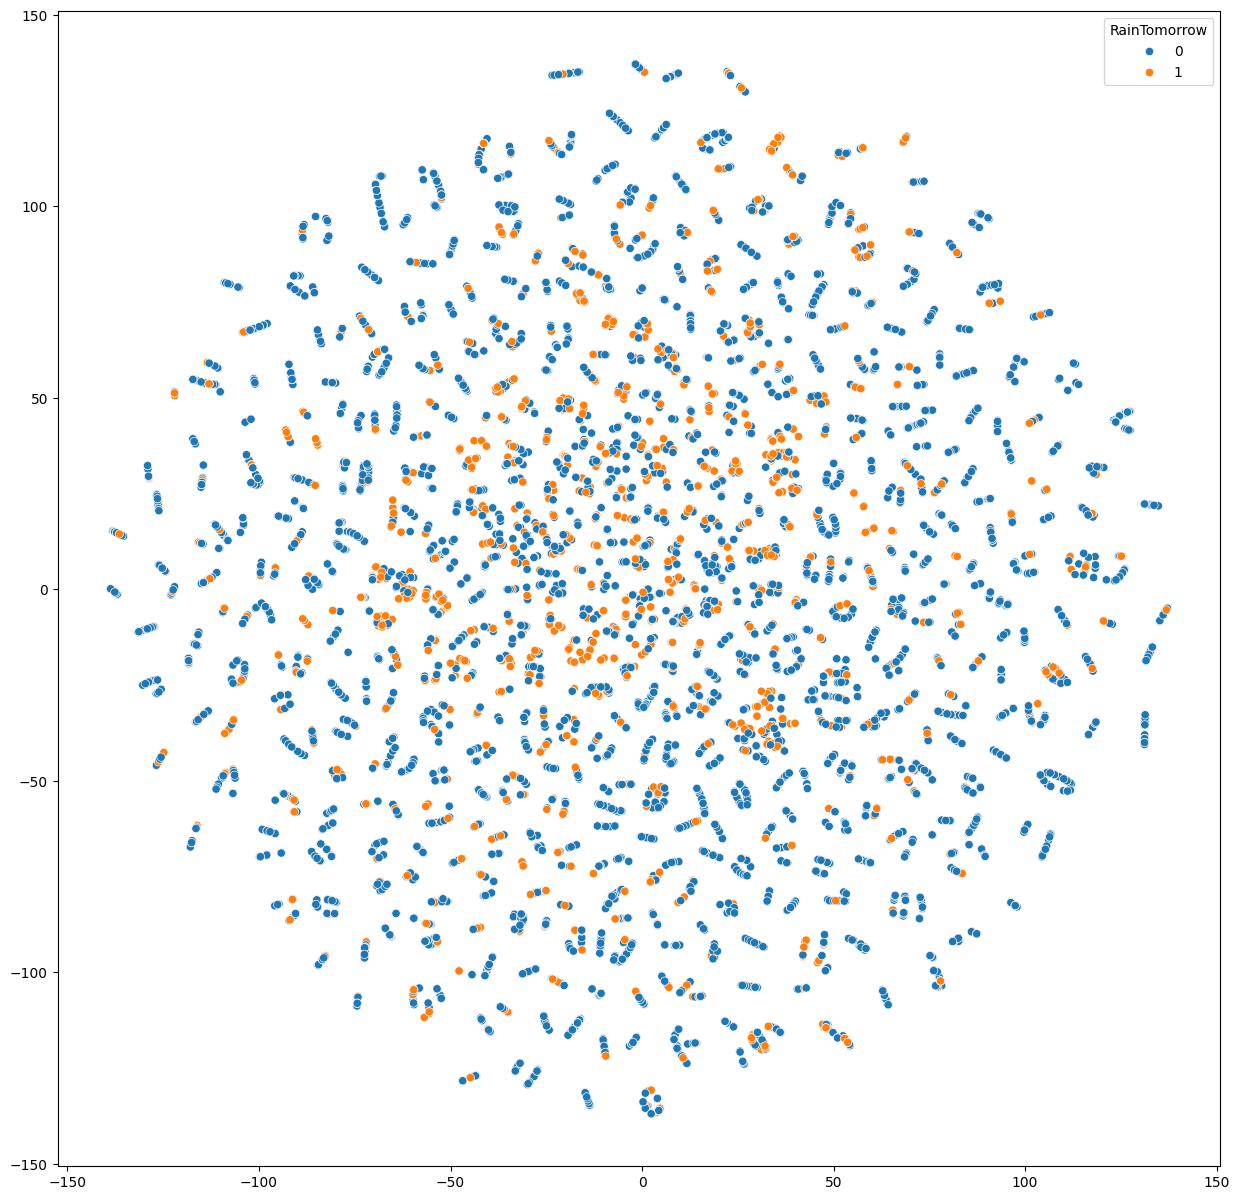

In [46]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=rains_embedded.T[0],y=rains_embedded.T[1], hue=s_y)

In [47]:
embedds = []
for i in [5, 10, 20, 30, 40, 50, 60]:
    embedds.append(TSNE(n_components=2, learning_rate='auto',init='random', perplexity=i).fit_transform(s_x))


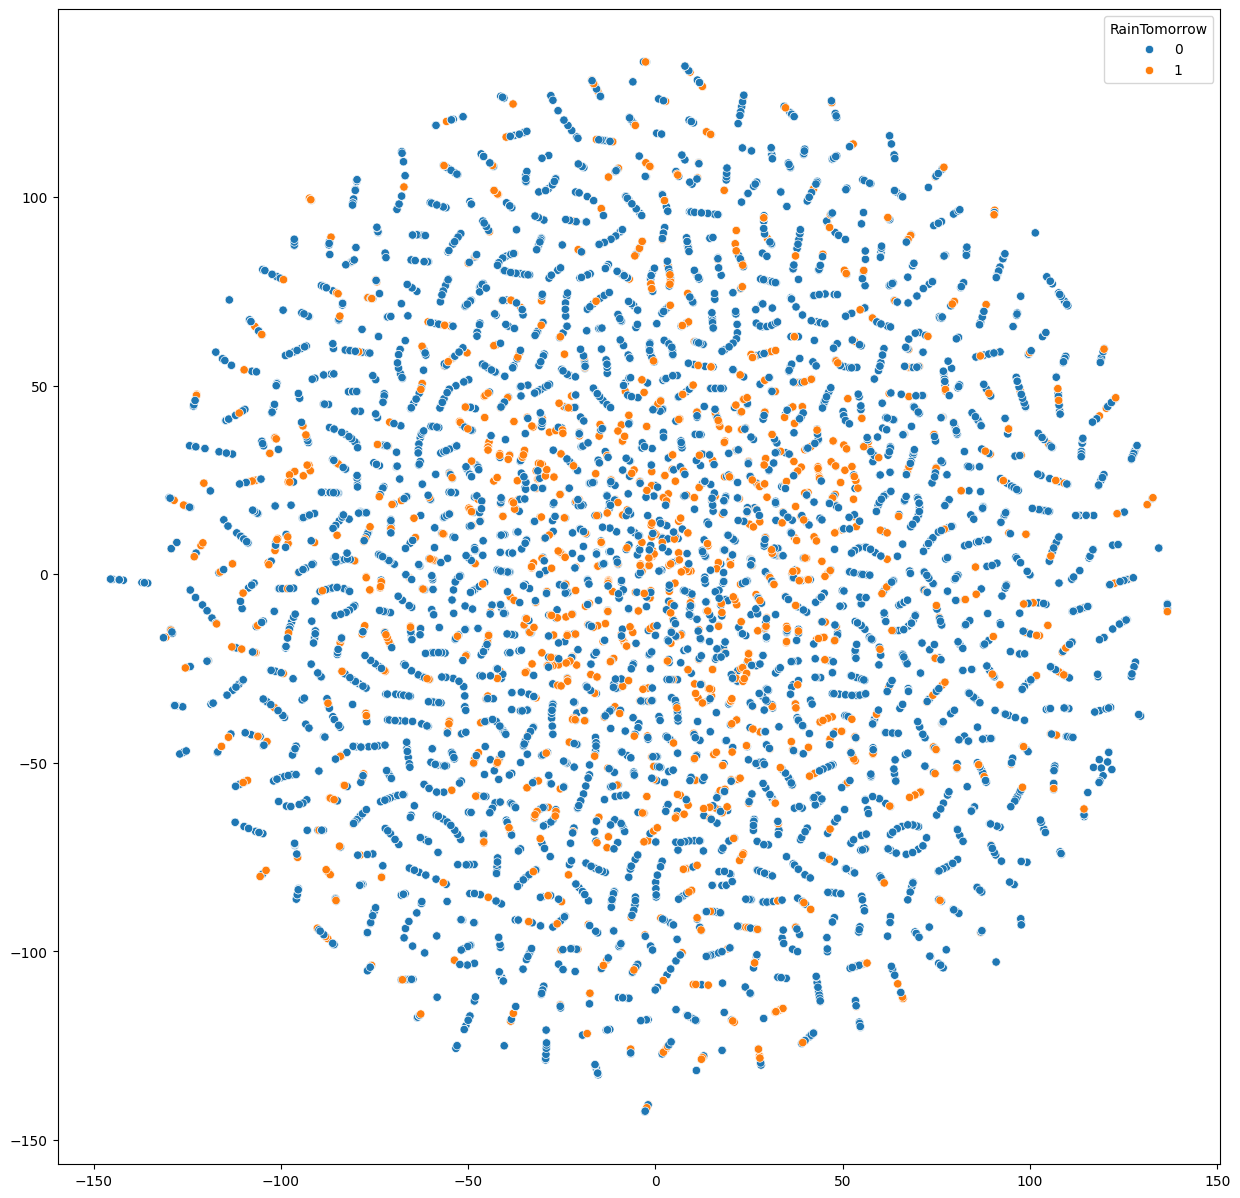

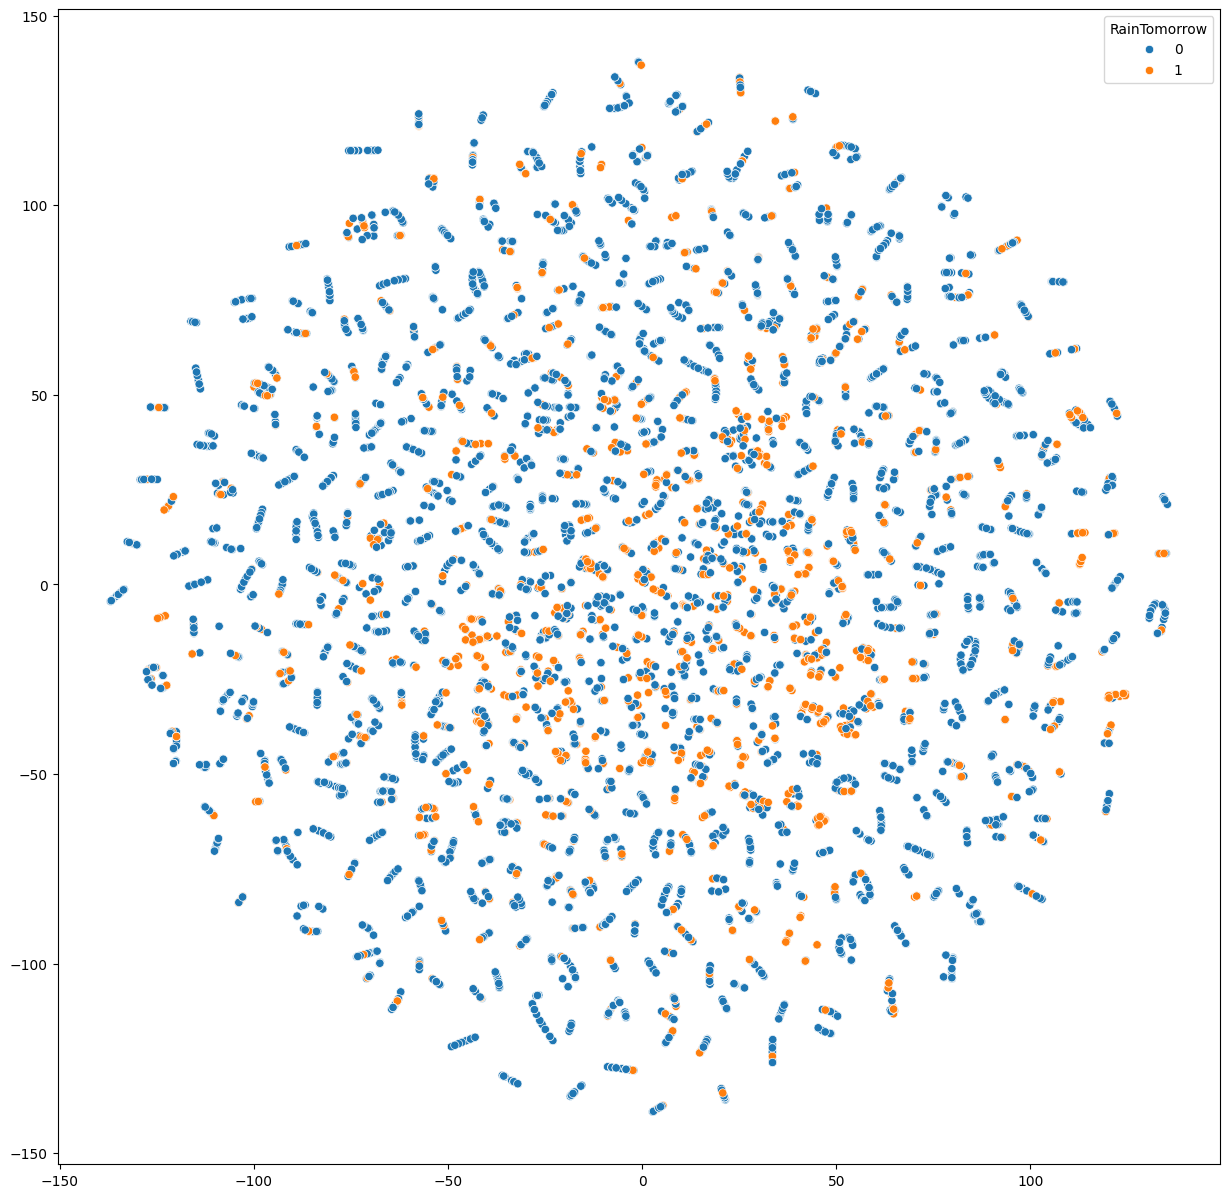

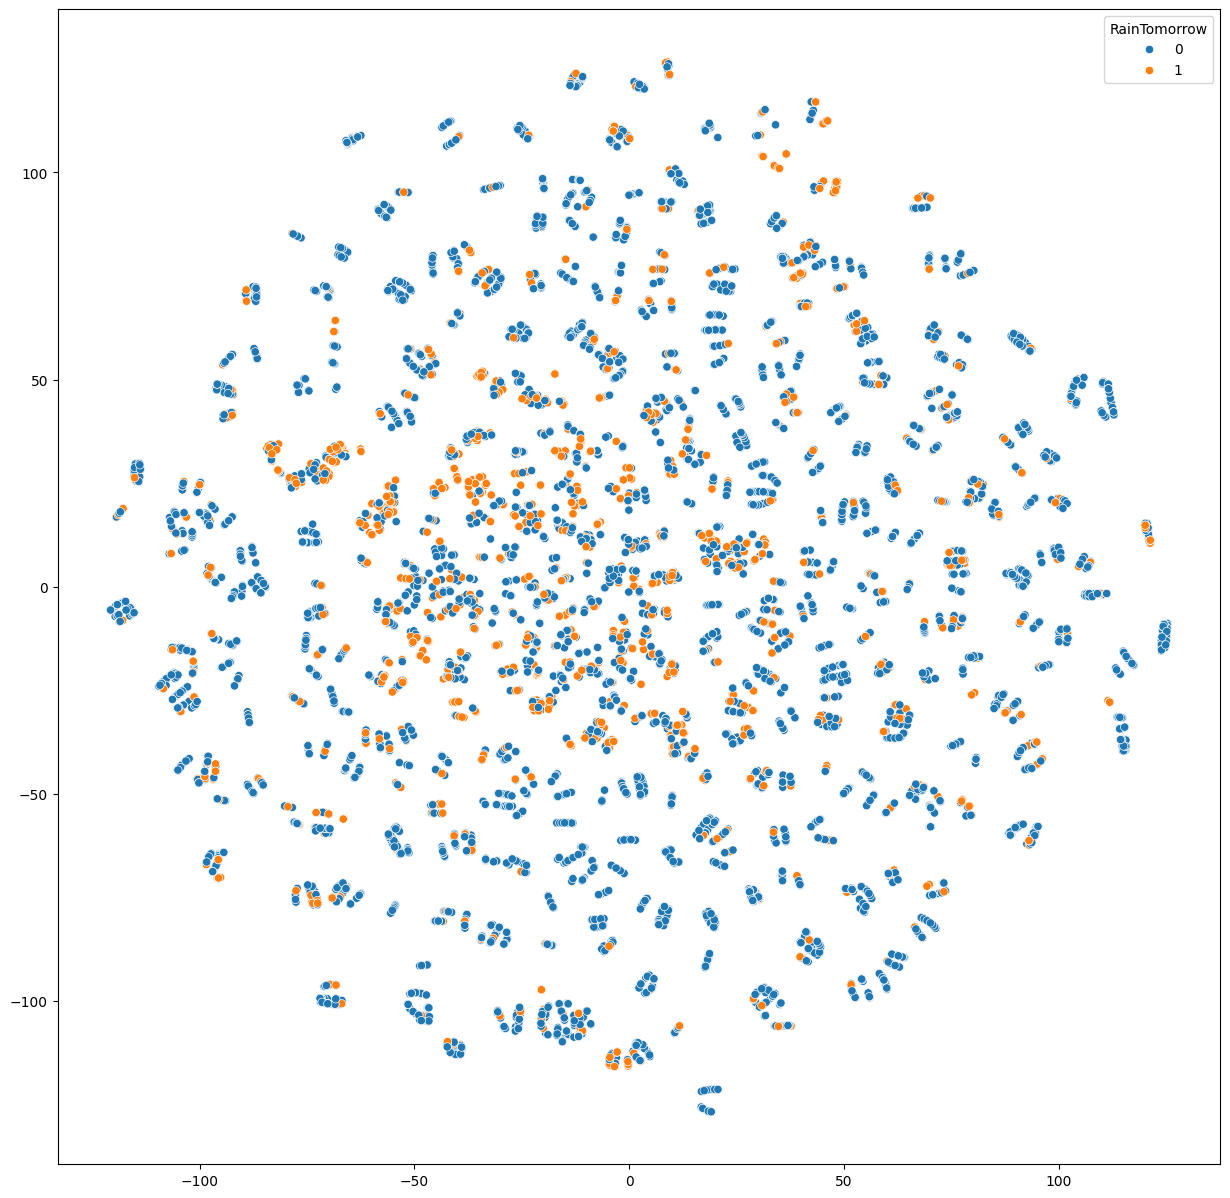

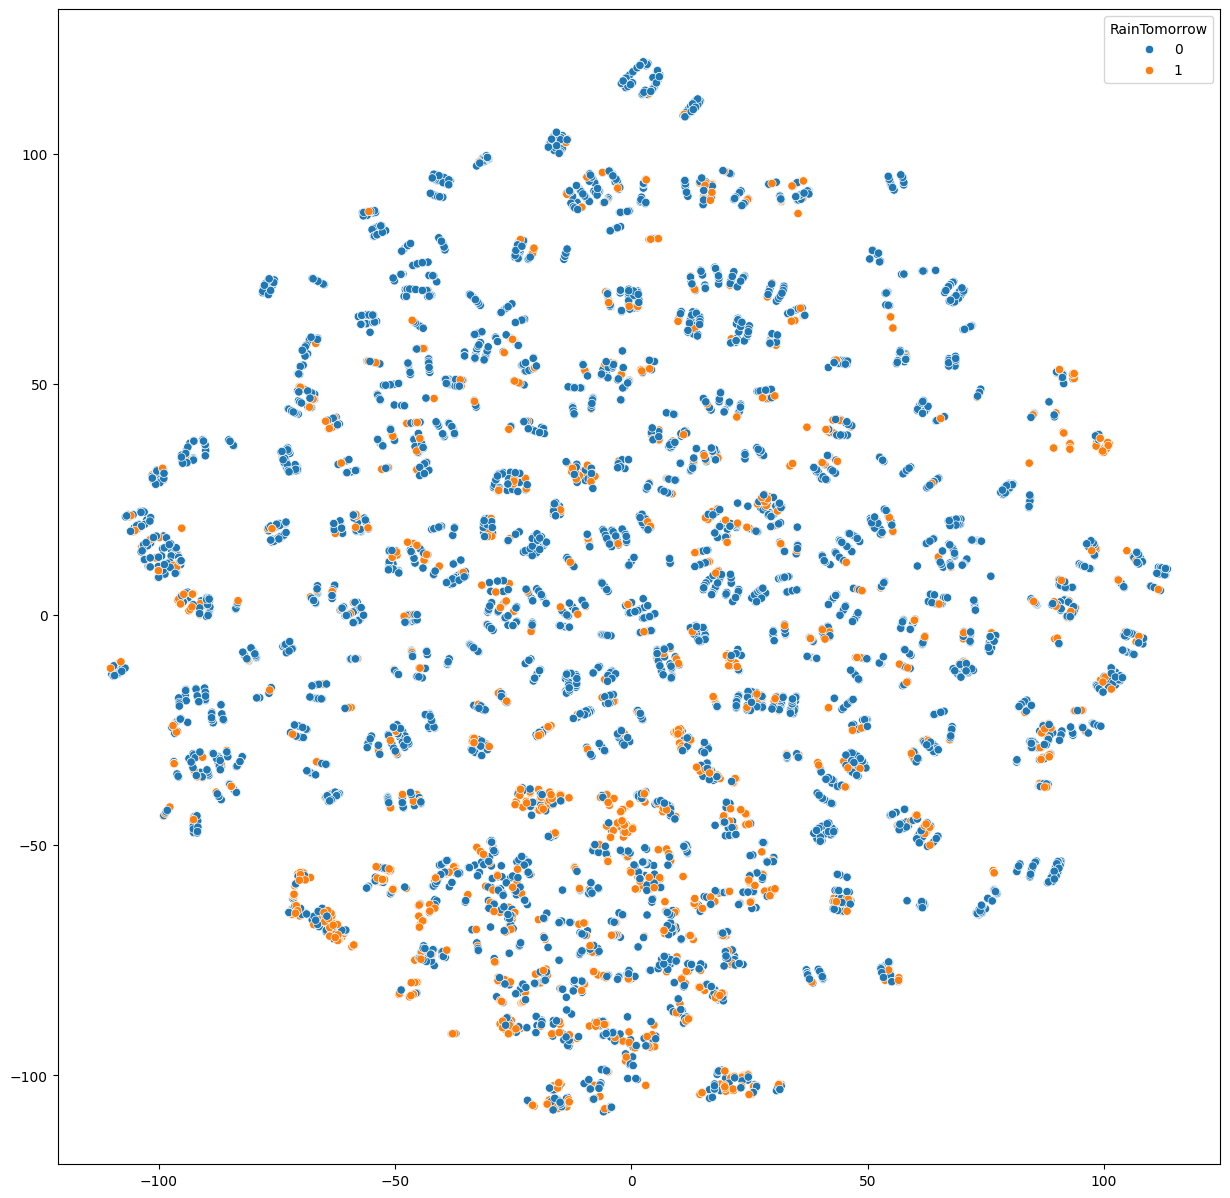

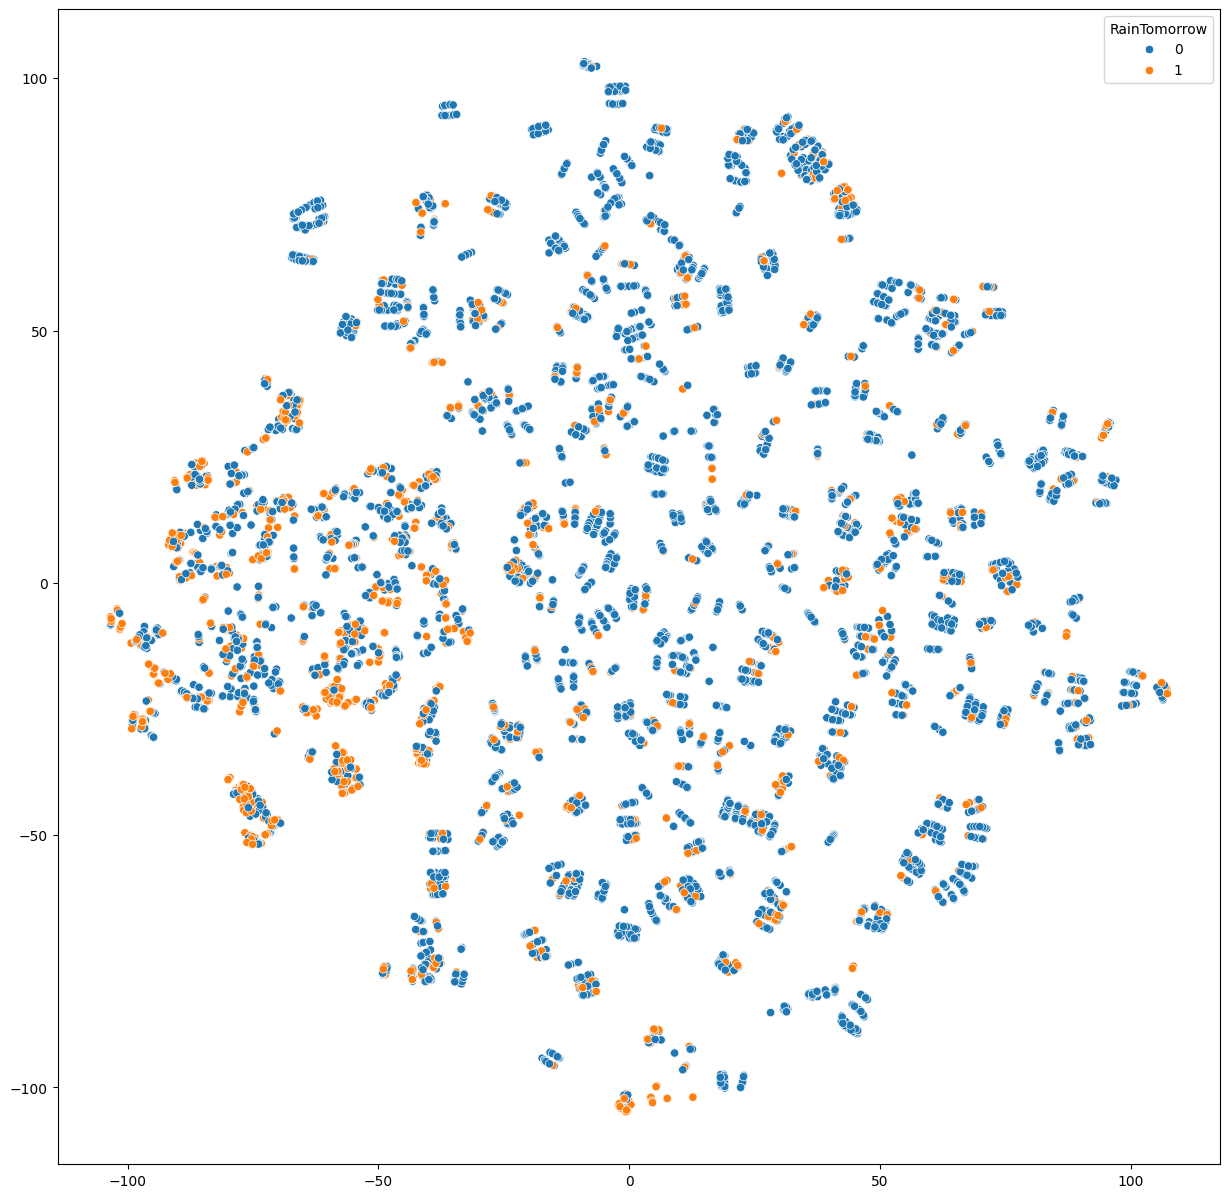

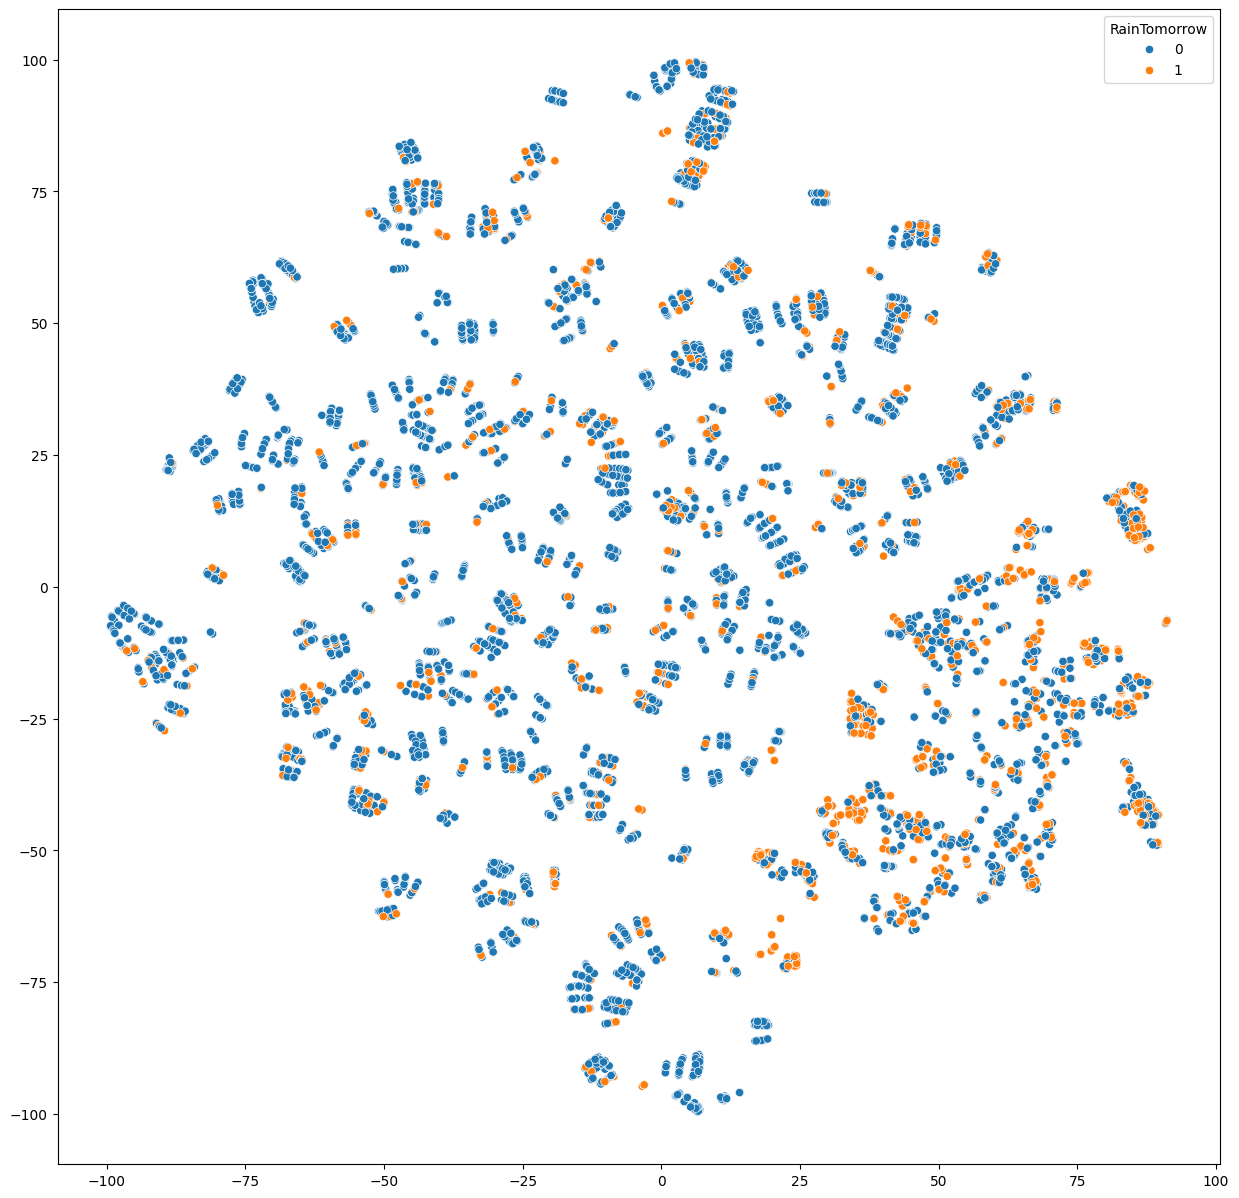

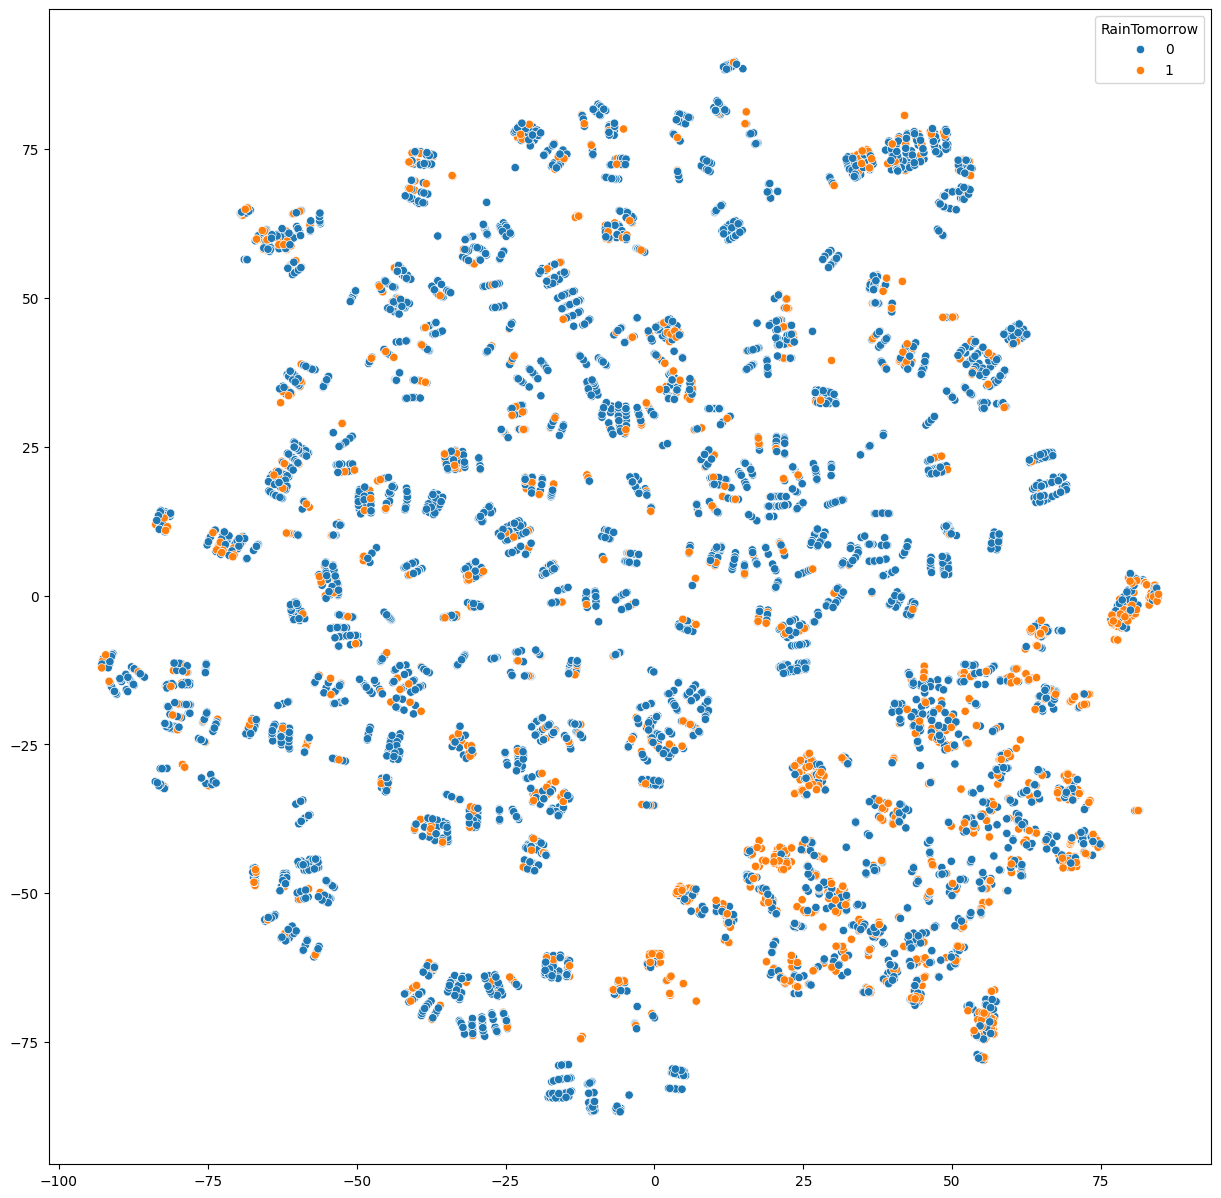

In [48]:
for em in embedds:
    plt.figure(figsize=(15,15))
    sns.scatterplot(x=em.T[0],y=em.T[1], hue=s_y)

<Axes: >

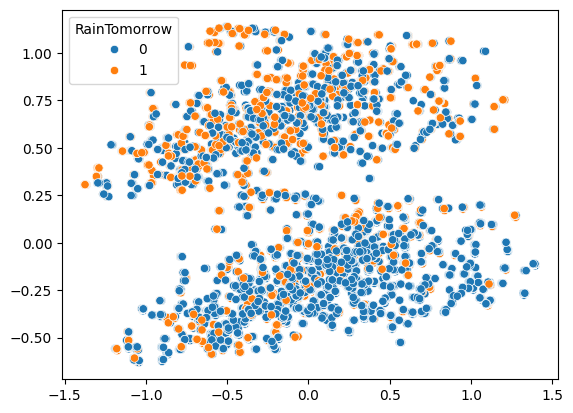

In [49]:
from sklearn.decomposition import PCA
pca_emb = PCA(n_components=2).fit_transform(rains_x)
sns.scatterplot(x=pca_emb.T[0], y=pca_emb.T[1], hue = rains_y)

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

class RainTodayTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["RainTodayNull"] = X["RainToday"].isnull().astype(np.int64)
        X["RainToday"] = X["RainToday"].fillna(0).apply(lambda rain: 1 if rain == "Yes" else 0)
        return X

# Custom transformer for merging location data and filling coordinates
class CoordinateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, coordinates, city_coords):
        self.coordinates = coordinates
        self.city_coords = city_coords

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Merge coordinates
        merged = X.merge(self.coordinates[["Location", "lat", "lng"]], right_on="Location", left_on="Location", how="left")

        # Fill missing latitude and longitude
        merged.loc[merged["lat"].isnull(), "lat"] = merged.loc[
            merged["lat"].isnull(), "Location"
        ].apply(lambda loc: self.city_coords[loc][0] if loc in self.city_coords else None).astype(np.float64)

        merged.loc[merged["lng"].isnull(), "lng"] = merged.loc[
            merged["lng"].isnull(), "Location"
        ].apply(lambda loc: self.city_coords[loc][1] if loc in self.city_coords else None).astype(np.float64)

        return merged

# Custom transformer for handling wind directions
class WindDirectionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Define mapping of directions to degrees
        self.direction_to_degrees = {direction: i * 22.5 for i, direction in enumerate(
            ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
        )}
        return self

    def transform(self, X):
        # Map directions to degrees
        X["WindGustDirDeg"] = X["WindGustDir"].map(self.direction_to_degrees)
        X["WindDir9amDeg"] = X["WindDir9am"].map(self.direction_to_degrees)
        X["WindDir3pmDeg"] = X["WindDir3pm"].map(self.direction_to_degrees)

        # Drop original direction columns
        X.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm"], inplace=True)
        return X

# Custom transformer for converting RainTomorrow to binary
class RainTomorrowTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["RainTomorrow"] = X["RainTomorrow"].apply(lambda rain: 1 if rain == "Yes" else 0)
        return X

pipeline = Pipeline(steps=[
    ("imputer", HierarchicalImputer()),
    ("rain_today", RainTodayTransformer()),
    ("coordinates", CoordinateTransformer(coordinates, city_coords)),
    ("wind_direction", WindDirectionTransformer())
])

# Apply the pipeline
processed_data = pipeline.fit_transform(X_train.drop(columns=["RainTomorrow"]))

KeyError: 'RainTomorrow'